In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'/Users/praveen/MSDS/MachineLearning/KaggleChallenges/Challenge2/Data'

In [2]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_35906/2922911961.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


In [3]:
train = pd.read_csv("./train_data_new.csv")
test = pd.read_csv("./test_data_new.csv")
cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
train_num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']
test_num_vars = [col for col in train_num_vars if col != "winner_ratio"]



/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_35906/1325753709.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("./train_data_new.csv")


# Missing Values analysis:

In [4]:
# fake_missing_values = ['0', '0.0', 'Uncoded', 'None', '']
# for col in cat_vars:
#     col_values = train[col].astype(str)
#     value_counts = col_values[col_values.isin(fake_missing_values)].value_counts()

#     if not value_counts.empty:
#         print(f"\nColumn '{col}':")
#         print(value_counts.rename("count").to_frame())
#         print(f"→ Replacing total {value_counts.sum()} entries with 'Other_{col}'")
        
#         train.loc[col_values.isin(fake_missing_values), col] = f"Other_{col}"
#     else:
#         print(f"\nColumn '{col}': No fake-missing values found.")


In [5]:
fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = train[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(train[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
train.drop(index=rows_to_drop, inplace=True)
train.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0      1468
→ Found 1468 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        4431
→ Found 4431 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 4447 rows from train DataFrame.


In [6]:
### Check fake missing values for test data

fake_missing_values = ['0', '0.0', 'None', '']

# To keep track of all rows with fake-missing values
rows_to_drop = set()

for col in cat_vars:
    col_values = test[col].astype(str)
    mask = col_values.isin(fake_missing_values)
    value_counts = col_values[mask].value_counts()

    if not value_counts.empty:
        print(f"\nColumn '{col}':")
        print(value_counts.rename("count").to_frame())
        print(f"→ Found {mask.sum()} rows with fake-missing values — marking for drop")
        
        # Add row indices to the drop set
        rows_to_drop.update(test[mask].index)
    else:
        print(f"\nColumn '{col}': No fake-missing values found.")

# Drop all affected rows once
print(f"\n🚨 Dropping total {len(rows_to_drop)} rows from train DataFrame.")
test.drop(index=rows_to_drop, inplace=True)
test.reset_index(drop=True, inplace=True)  # Optional: clean index after drop



Column 'general_sector': No fake-missing values found.

Column 'city':
      count
city       
0       952
→ Found 952 rows with fake-missing values — marking for drop

Column 'zip_code':
          count
zip_code       
0.0        2895
→ Found 2895 rows with fake-missing values — marking for drop

Column 'specific_sector': No fake-missing values found.

Column 'state': No fake-missing values found.

Column 'contributor_type': No fake-missing values found.

🚨 Dropping total 2910 rows from train DataFrame.


In [7]:
print(train.shape, test.shape)

(168401, 57) (112322, 58)


In [8]:
cols = ["governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd",
        "house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd",
        "senate_contribution_ratio",    "senate_contributions_sum_2010_usd", "contribution_sum_2010_usd",
        "us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd",
        "us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"
        ]
train[cols].iloc[1435:1438]


,governor_contribution_ratio,governor_contributions_sum_2010_usd,contribution_sum_2010_usd,house_and_assembly_contribution_ratio,house_and_assembly_contributions_sum_2010_usd,contribution_sum_2010_usd,senate_contribution_ratio,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_house_contribution_ratio,us_house_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contribution_ratio,us_senate_contributions_sum_2010_usd,contribution_sum_2010_usd
1435,0.139877,2284.93,16335.31,0.215339,3517.63,16335.31,0.644784,10532.75,16335.31,0.0,0.0,16335.31,0.0,0.00,16335.31
1436,0.0,0.00,8065.60,0.000000,0.00,8065.60,0.0,0.00,8065.60,1.0,8065.6,8065.60,0.0,0.00,8065.60
1437,0.0,0.00,1497.66,0.000000,0.00,1497.66,0.0,0.00,1497.66,0.0,0.0,1497.66,1.0,1497.66,1497.66


In [9]:
train[train_num_vars] = train[train_num_vars].apply(pd.to_numeric, errors='coerce')
test[test_num_vars] = test[test_num_vars].apply(pd.to_numeric, errors='coerce')

In [10]:

# cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
# 'governor_contributions_sum_2010_usd',
# 'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
# 'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
# 'us_house_contribution_ratio','us_senate_contribution_ratio']

# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)
#     test[col] = test[col].clip(lower=0)

In [11]:
# Drop states with count less than 5
state_counts = train['state'].value_counts()

# Filter to keep only states with at least 5 records
train = train[train['state'].isin(state_counts[state_counts >= 10].index)]


In [12]:
# 1. Check how many duplicate rows exist
num_duplicates_train = train.duplicated().sum()
num_duplicates_test = train.duplicated().sum()

print(f"🔍 Number of duplicate rows in train: {num_duplicates_train}")
print(f"🔍 Number of duplicate rows in test: {num_duplicates_test}")

# 2. Drop duplicate records
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"✅ Duplicates removed for train. New shape: {train.shape}")
print(f"✅ Duplicates removed for test. New shape: {test.shape}")

🔍 Number of duplicate rows in train: 2172
🔍 Number of duplicate rows in test: 2172
✅ Duplicates removed for train. New shape: (166203, 57)
✅ Duplicates removed for test. New shape: (112322, 58)


# Check association between categorical variables and target variable

In [13]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd

# Ensure winner_ratio is numeric
train["winner_ratio"] = pd.to_numeric(train["winner_ratio"], errors="coerce")

results = []

for col in cat_vars:
    unique_vals = train[col].nunique()
    
    if unique_vals < 2:
        print(f"⚠️ Skipping '{col}' — only one category")
        continue

    print(f"\n📊 Analyzing '{col}' with {unique_vals} categories:")

    # Drop rows with missing or bad values in current column
    df = train[[col, "winner_ratio"]].dropna()
    
    # Binary case: t-test
    if unique_vals == 2:
        groups = list(df[col].unique())
        g1 = df[df[col] == groups[0]]["winner_ratio"]
        g2 = df[df[col] == groups[1]]["winner_ratio"]
        stat, pval = ttest_ind(g1, g2, equal_var=False)
        test_type = "t-test"
    else:
        # Multi-category case: ANOVA
        group_list = [group["winner_ratio"].values for _, group in df.groupby(col)]
        stat, pval = f_oneway(*group_list)
        test_type = "ANOVA"

    print(f"🧪 {test_type} → F/t-stat = {stat:.4f}, p-value = {pval:.4e}")
    results.append({"column": col, "test": test_type, "stat": stat, "p_value": pval})

# Convert to DataFrame for sorting or exporting
test_results = pd.DataFrame(results).sort_values("p_value")

print("\n✅ Summary of most statistically associated categorical variables:")
print(test_results.head(10))



📊 Analyzing 'general_sector' with 135 categories:
🧪 ANOVA → F/t-stat = 19.0330, p-value = 0.0000e+00

📊 Analyzing 'city' with 8778 categories:
🧪 ANOVA → F/t-stat = 1.6992, p-value = 6.5575e-301

📊 Analyzing 'zip_code' with 15454 categories:
🧪 ANOVA → F/t-stat = 1.5328, p-value = 1.2756e-314

📊 Analyzing 'specific_sector' with 408 categories:
🧪 ANOVA → F/t-stat = 8.4620, p-value = 0.0000e+00

📊 Analyzing 'state' with 35 categories:
🧪 ANOVA → F/t-stat = 107.5214, p-value = 0.0000e+00

📊 Analyzing 'contributor_type' with 3 categories:
🧪 ANOVA → F/t-stat = 1056.4242, p-value = 0.0000e+00

✅ Summary of most statistically associated categorical variables:
             column   test         stat        p_value
0    general_sector  ANOVA    19.032950   0.000000e+00
3   specific_sector  ANOVA     8.461971   0.000000e+00
4             state  ANOVA   107.521373   0.000000e+00
5  contributor_type  ANOVA  1056.424172   0.000000e+00
2          zip_code  ANOVA     1.532842  1.275586e-314
1          

### Dropping zip_code and city columns, since they're found to be least significant and with high cardinallity

In [14]:
train.drop(["city", "zip_code"], axis=1, inplace= True)
test.drop(["city", "zip_code"], axis=1, inplace= True)

for col in ["city", "zip_code","specific_sector","general_sector"]:
    if col in cat_vars:
        cat_vars.remove(col)

In [15]:
train.general_sector.value_counts().to_clipboard()

## Bucketize different general sector categories into bigger category

In [16]:

# 1) define umbrella buckets and list the exact sectors that go into each
umbrella_map = {
    "Unknown / Uncoded": [
        "Uncoded",
        "No Employer Listed or Found",
        "Employer Listed/Category Unknown",
        "Generic Occupation/Category Unknown",
        "Other",
        "Other/Single Issue Groups",
        "Non-Contribution",
        "Unitemized Contributions",
        "Balance Forward",
    ],
    "Retired / Homemakers": [
        "Retired",
        "Homemakers/Non-income earners",
    ],
    "Legal & Lobbying": [
        "Lawyers & Lobbyists",
        "Accountants",
    ],
    "Public Sector & Campaigns": [
        "Civil Servants/Public Officials",
        "Candidate Contributions",
        "Candidate Committees",
        "Joint Candidate Committee",
        "Party Committees",
        "Leadership PACs",
        "Public Sector Unions",
        "Transportation Unions",
    ],
    "Health & Pharma": [
        "Health Professionals",
        "Health Services",
        "Hospitals & Nursing Homes",
        "Pharmaceuticals & Health Products",
        "Health & Welfare Policy",
        "Miscellaneous Health",
    ],
    "Education & Nonprofit": [
        "Education",
        "Nonprofit Institutions",
        "Public Education Policy",
    ],
    "Finance & Real Estate": [
        "Commercial Banks",
        "Credit Unions",
        "Insurance",
        "Savings & Loans",
        "Securities & Investment",
        "Miscellaneous Finance",
        "Finance & Credit Companies",
        "Banks & Lending Institutions",
        "Real Estate",
        "Miscellaneous Finance, Insurance & Real Estate",
    ],
    "Construction & Manufacturing": [
        "Construction Services",
        "General Contractors",
        "Home Builders",
        "Building Materials & Equipment",
        "Miscellaneous Manufacturing & Distributing",
        "Chemical & Related Manufacturing",
        "Electronics Manufacturing & Services",
        "Miscellaneous Business",
    ],
    "Energy & Resources": [
        "Oil & Gas",
        "Electric Utilities",
        "Water Utilities",
        "Nuclear Energy",
        "Mining",
        "Aluminum Mining & Processing",
        "Smelting & Refining",
        "Miscellaneous Energy",
        "Waste Management",
        "Agricultural Services & Products",
        "Crop Production & Basic Processing",
        "Livestock",
        "Dairy",
        "Poultry & Eggs",
    ],
    "Technology & Telecom": [
        "Computer Equipment & Services",
        "Telecom Services & Equipment",
        "Cable TV",
        "Miscellaneous Communications & Electronics",
    ],
    "Retail, Food & Hospitality": [
        "Retail Sales",
        "Food & Beverage",
        "Beer, Wine & Liquor",
        "Food Processing & Sales",
        "Lodging & Tourism",
        "Recreation & Live Entertainment",
        "Movie Theaters",
    ],
    "Transport & Logistics": [
        "Air Transport",
        "Sea Transport",
        "Railroads",
        "Trucking",
        "Miscellaneous Transport",
        "Commercial Fishing",
    ],
    "Entertainment & Media": [
        "TV & Movie Production/Distribution",
        "Recorded Music Production",
        "Live Theater/Other Entertainment Productions",
        "Bands, Orchestras & Other Live Music Production",
        "Gambling & Casinos",
    ],
    "Labor & Trade": [
        "Special Trade Contractors",
        "General Trade Unions",
        "Public Sector Unions",
        "Transportation Unions",
        "Miscellaneous Services",
    ],
    "Policy & Single‑Issue": [
        "Pro-Environmental Policy",
        "Liberal Policy Organization",
        "Conservative Policy Organization",
        "Foreign & Defense Policy",
        "Gun Control",
        "Abortion Policy",
        "Drug Policy",
        "Tax Issues",
        "Animal Rights",
        "Gay/Lesbian Rights & Issues",
        "Women's Issues",
        "Human Rights",
        "Right to Die",
        "Welfare/Social Work",
        "Elderly/Social Security",
        "Tribal Governments",
    ],
    "Defense & Military": [
        "Military",
        "Defense Aerospace",
        "Defense Electronics",
        "Miscellaneous Defense",
    ],
}

# 2) invert that dict so we can map each raw label to its umbrella
flat_map = { raw: umbrella
             for umbrella, raws in umbrella_map.items()
             for raw in raws }

# 3) assign; any label not in our map goes into “Other / Misc”
train["general_sector_new"] = train["general_sector"].map(flat_map).fillna("Other / Misc")
test["general_sector_new"] = test["general_sector"].map(flat_map).fillna("Other / Misc")

train.drop(["general_sector"], axis=1, inplace=True)
test.drop(["general_sector"], axis=1, inplace=True)

# 4) see how many per umbrella
print(train["general_sector_new"].value_counts())


general_sector_new
Unknown / Uncoded               48747
Legal & Lobbying                30269
Retired / Homemakers            23453
Finance & Real Estate           15270
Health & Pharma                 10766
Public Sector & Campaigns        7305
Construction & Manufacturing     5374
Education & Nonprofit            5124
Other / Misc                     4266
Energy & Resources               3988
Retail, Food & Hospitality       3498
Labor & Trade                    2772
Technology & Telecom             1927
Transport & Logistics            1412
Policy & Single‑Issue             772
Entertainment & Media             665
Defense & Military                595
Name: count, dtype: int64


In [17]:
cat_vars.append('general_sector_new')

In [18]:
train.specific_sector.value_counts().to_clipboard()

## Drop specific sector column, since we already have bigger sector categories

In [19]:

train.drop(["specific_sector"], axis=1, inplace=True)
test.drop(["specific_sector"], axis=1, inplace=True)

## Drop redundant columns:
##### Since we're already capturing essential information in ratio columns, so dropping base columns

#### Candidacy Ratios-
- candidacy_democratic_ratio = candidacy_democratic_count / candidacy_count
- candidacy_republican_ratio = candidacy_republican_count / candidacy_count

#### Politician Ratios- 
- politician_democratic_ratio = politician_democratic_count / politician_count
- politician_republican_ratio = politician_republican_count / politician_count
- politician_challenger_ratio = politician_challenger_count / politician_count
- politician_open_pos_ratio = politician_open_pos_count / politician_count
- politician_incumbency_ratio = politician_incumbency_count / politician_count

#### Contribution Count Ratios-
- contribution_democratic_count_ratio = contribution_democratic_count / contribution_count
- contribution_republican_count_ratio = contribution_republican_count / contribution_count

#### Contribution Sum Ratios (Money) -
- house_and_assembly_contribution_ratio = house_and_assembly_contributions_sum_2010_usd / contribution_sum_2010_usd
- senate_contribution_ratio = senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_house_contribution_ratio = us_house_contributions_sum_2010_usd / contribution_sum_2010_usd
- us_senate_contribution_ratio = us_senate_contributions_sum_2010_usd / contribution_sum_2010_usd
- governor_contribution_ratio = governor_contributions_sum_2010_usd / contribution_sum_2010_usd

In [20]:
# 1) Define the ratios you want to keep
ratio_cols = [

    ## ratio cols
    'candidacy_democratic_ratio',
    'candidacy_republican_ratio',
    'politician_democratic_ratio',
    'politician_republican_ratio',
    'politician_challenger_ratio',
    'politician_open_pos_ratio',
    'politician_incumbency_ratio',
    'contribution_democratic_count_ratio',
    'contribution_republican_count_ratio',
    'house_and_assembly_contribution_ratio',
    'senate_contribution_ratio',
    'us_house_contribution_ratio',
    'us_senate_contribution_ratio',
    'governor_contribution_ratio',
]

count_total_cols =[
    # total counts
    'candidacy_count',
    'politician_count',
    'contribution_count',

    # contribution sum columns
    'contribution_sum_2010_usd',
]

ratio_total_cols = ratio_cols + count_total_cols

# 2) List all “base” columns to drop
# 2) List all “base” columns to drop
drop_cols = [
    # candidacy counts
    'candidacy_democratic_count',
    'candidacy_republican_count',

    # politician counts
    'politician_democratic_count',
    'politician_republican_count',
    'politician_challenger_count',
    'politician_open_pos_count',
    'politician_incumbency_count',

    # contribution counts
    'contribution_democratic_count',
    'contribution_republican_count',

    # money sums
    'house_and_assembly_contributions_sum_2010_usd',
    'senate_contributions_sum_2010_usd',
    'us_house_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd',
    'governor_contributions_sum_2010_usd',
]

# 3) Keep your target, label/index, any categoricals you still need, plus the ratios
keep_cols = ratio_total_cols + [
    'winner_ratio',   # target
    'train_label',
    'index',
] + cat_vars       # your list of categorical variables

# 4) Compute final drop list = everything not in keep_cols
all_cols = train.columns.tolist()
to_drop = [c for c in all_cols if c in drop_cols]

print("→ Dropping these base columns:\n", to_drop)

# 5) Create the reduced DataFrame
train.drop(columns=to_drop, inplace= True)
print("\nRemaining columns:")
print(train.columns.tolist())


→ Dropping these base columns:
 ['candidacy_democratic_count', 'candidacy_republican_count', 'contribution_democratic_count', 'contribution_republican_count', 'politician_challenger_count', 'politician_democratic_count', 'politician_incumbency_count', 'politician_open_pos_count', 'politician_republican_count', 'governor_contributions_sum_2010_usd', 'house_and_assembly_contributions_sum_2010_usd', 'senate_contributions_sum_2010_usd', 'us_house_contributions_sum_2010_usd', 'us_senate_contributions_sum_2010_usd']

Remaining columns:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politi

In [21]:
## Remove those columns from list
train_num_vars = [col for col in train_num_vars if col not in drop_cols]
test_num_vars = [col for col in test_num_vars if col not in drop_cols]


In [22]:
## Check which columns have infinite(inf) values
for col in train_num_vars:
    if not np.all(np.isfinite(train[col])):
        print(f"{col} has non-finite values.")


governor_contribution_ratio has non-finite values.
house_and_assembly_contribution_ratio has non-finite values.
senate_contribution_ratio has non-finite values.
us_house_contribution_ratio has non-finite values.
us_senate_contribution_ratio has non-finite values.


In [23]:
import numpy as np
import pandas as pd

import numpy as np

def drop_nonfinite_rows(df, cols):
    # Create a boolean mask for rows with any non-finite value in specified columns
    mask = ~np.isfinite(df[cols]).all(axis=1)

    # Count and print how many rows will be dropped
    num_bad_rows = mask.sum()
    print(f"→ Dropping {num_bad_rows} rows with NaN, inf, or -inf in columns: {cols}")

    # Drop those rows
    df_clean = df[~mask].copy()

    return df_clean


train= drop_nonfinite_rows(train, train_num_vars)
test = drop_nonfinite_rows(test, test_num_vars)

→ Dropping 3 rows with NaN, inf, or -inf in columns: ['winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'candidacy_democratic_ratio', 'candidacy_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'governor_contribution_ratio', 'house_and_assembly_contribution_ratio', 'politician_challenger_ratio', 'politician_democratic_ratio', 'politician_incumbency_ratio', 'politician_open_pos_ratio', 'politician_republican_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm']
→ Dro

## Check distribution of the different features

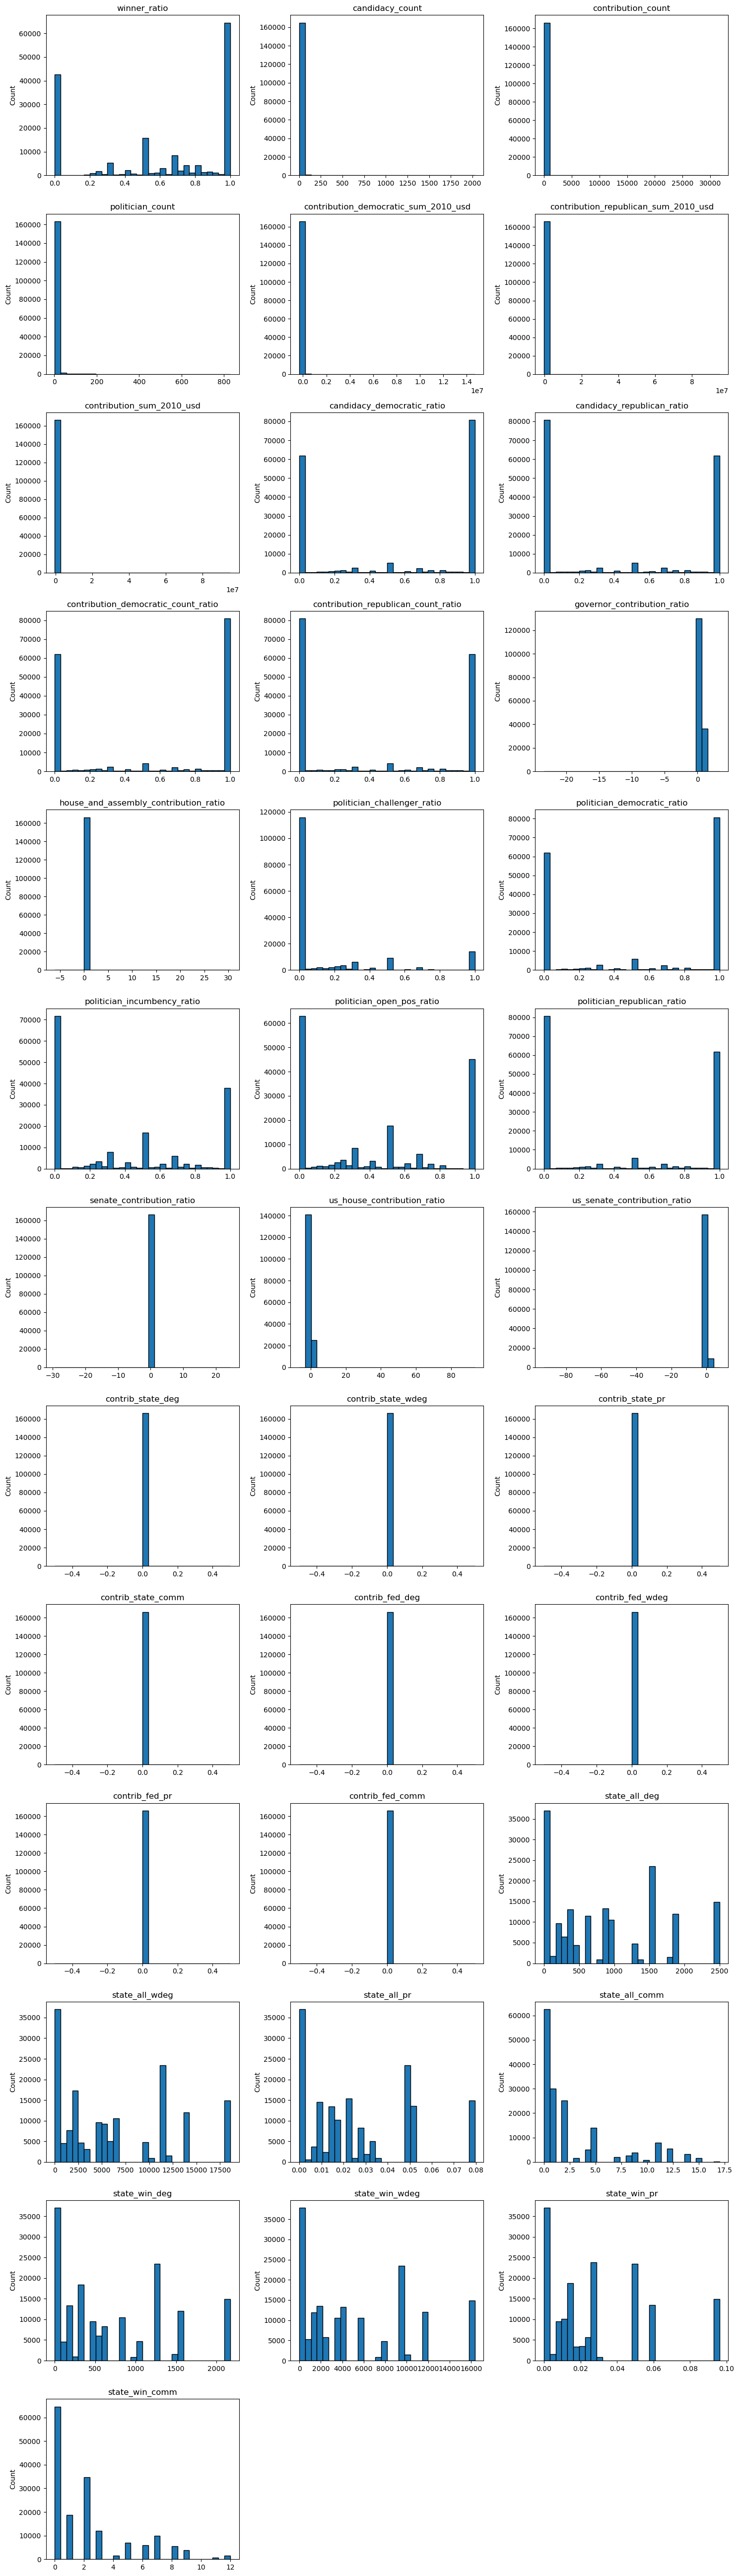

In [24]:
import matplotlib.pyplot as plt

def plot_histograms(df, train_num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(train_num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, train_num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(train, train_num_vars)


In [25]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):
   
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(figsize[0], figsize[1]*rows), squeeze=False)
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].dropna()
        # drop non-finite
        data = data[np.isfinite(data)]
        if data.empty:
            ax.set_title(f"{col}\n(no data)")
            continue

        mn, mx = data.min(), data.max()

        # decide linear vs log
        if mn >= 0 and mx/mn if mn>0 else np.inf > wide_range_factor:
            # log‐scale histogram
            # protect against zeros by starting at a small positive epsilon
            low = mn if mn>0 else data[data>0].min()
            edges = np.logspace(np.log10(low), np.log10(mx), bins)
            ax.hist(data, bins=edges, edgecolor='black')
            ax.set_xscale('log')
            ax.set_title(f"{col}\n(log scale)")
        else:
            # linear histogram
            ax.hist(data, bins=bins, range=(mn, mx), edgecolor='black')
            ax.set_title(col)

        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=30)

    # remove any extra subplots
    for ax in axes[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()


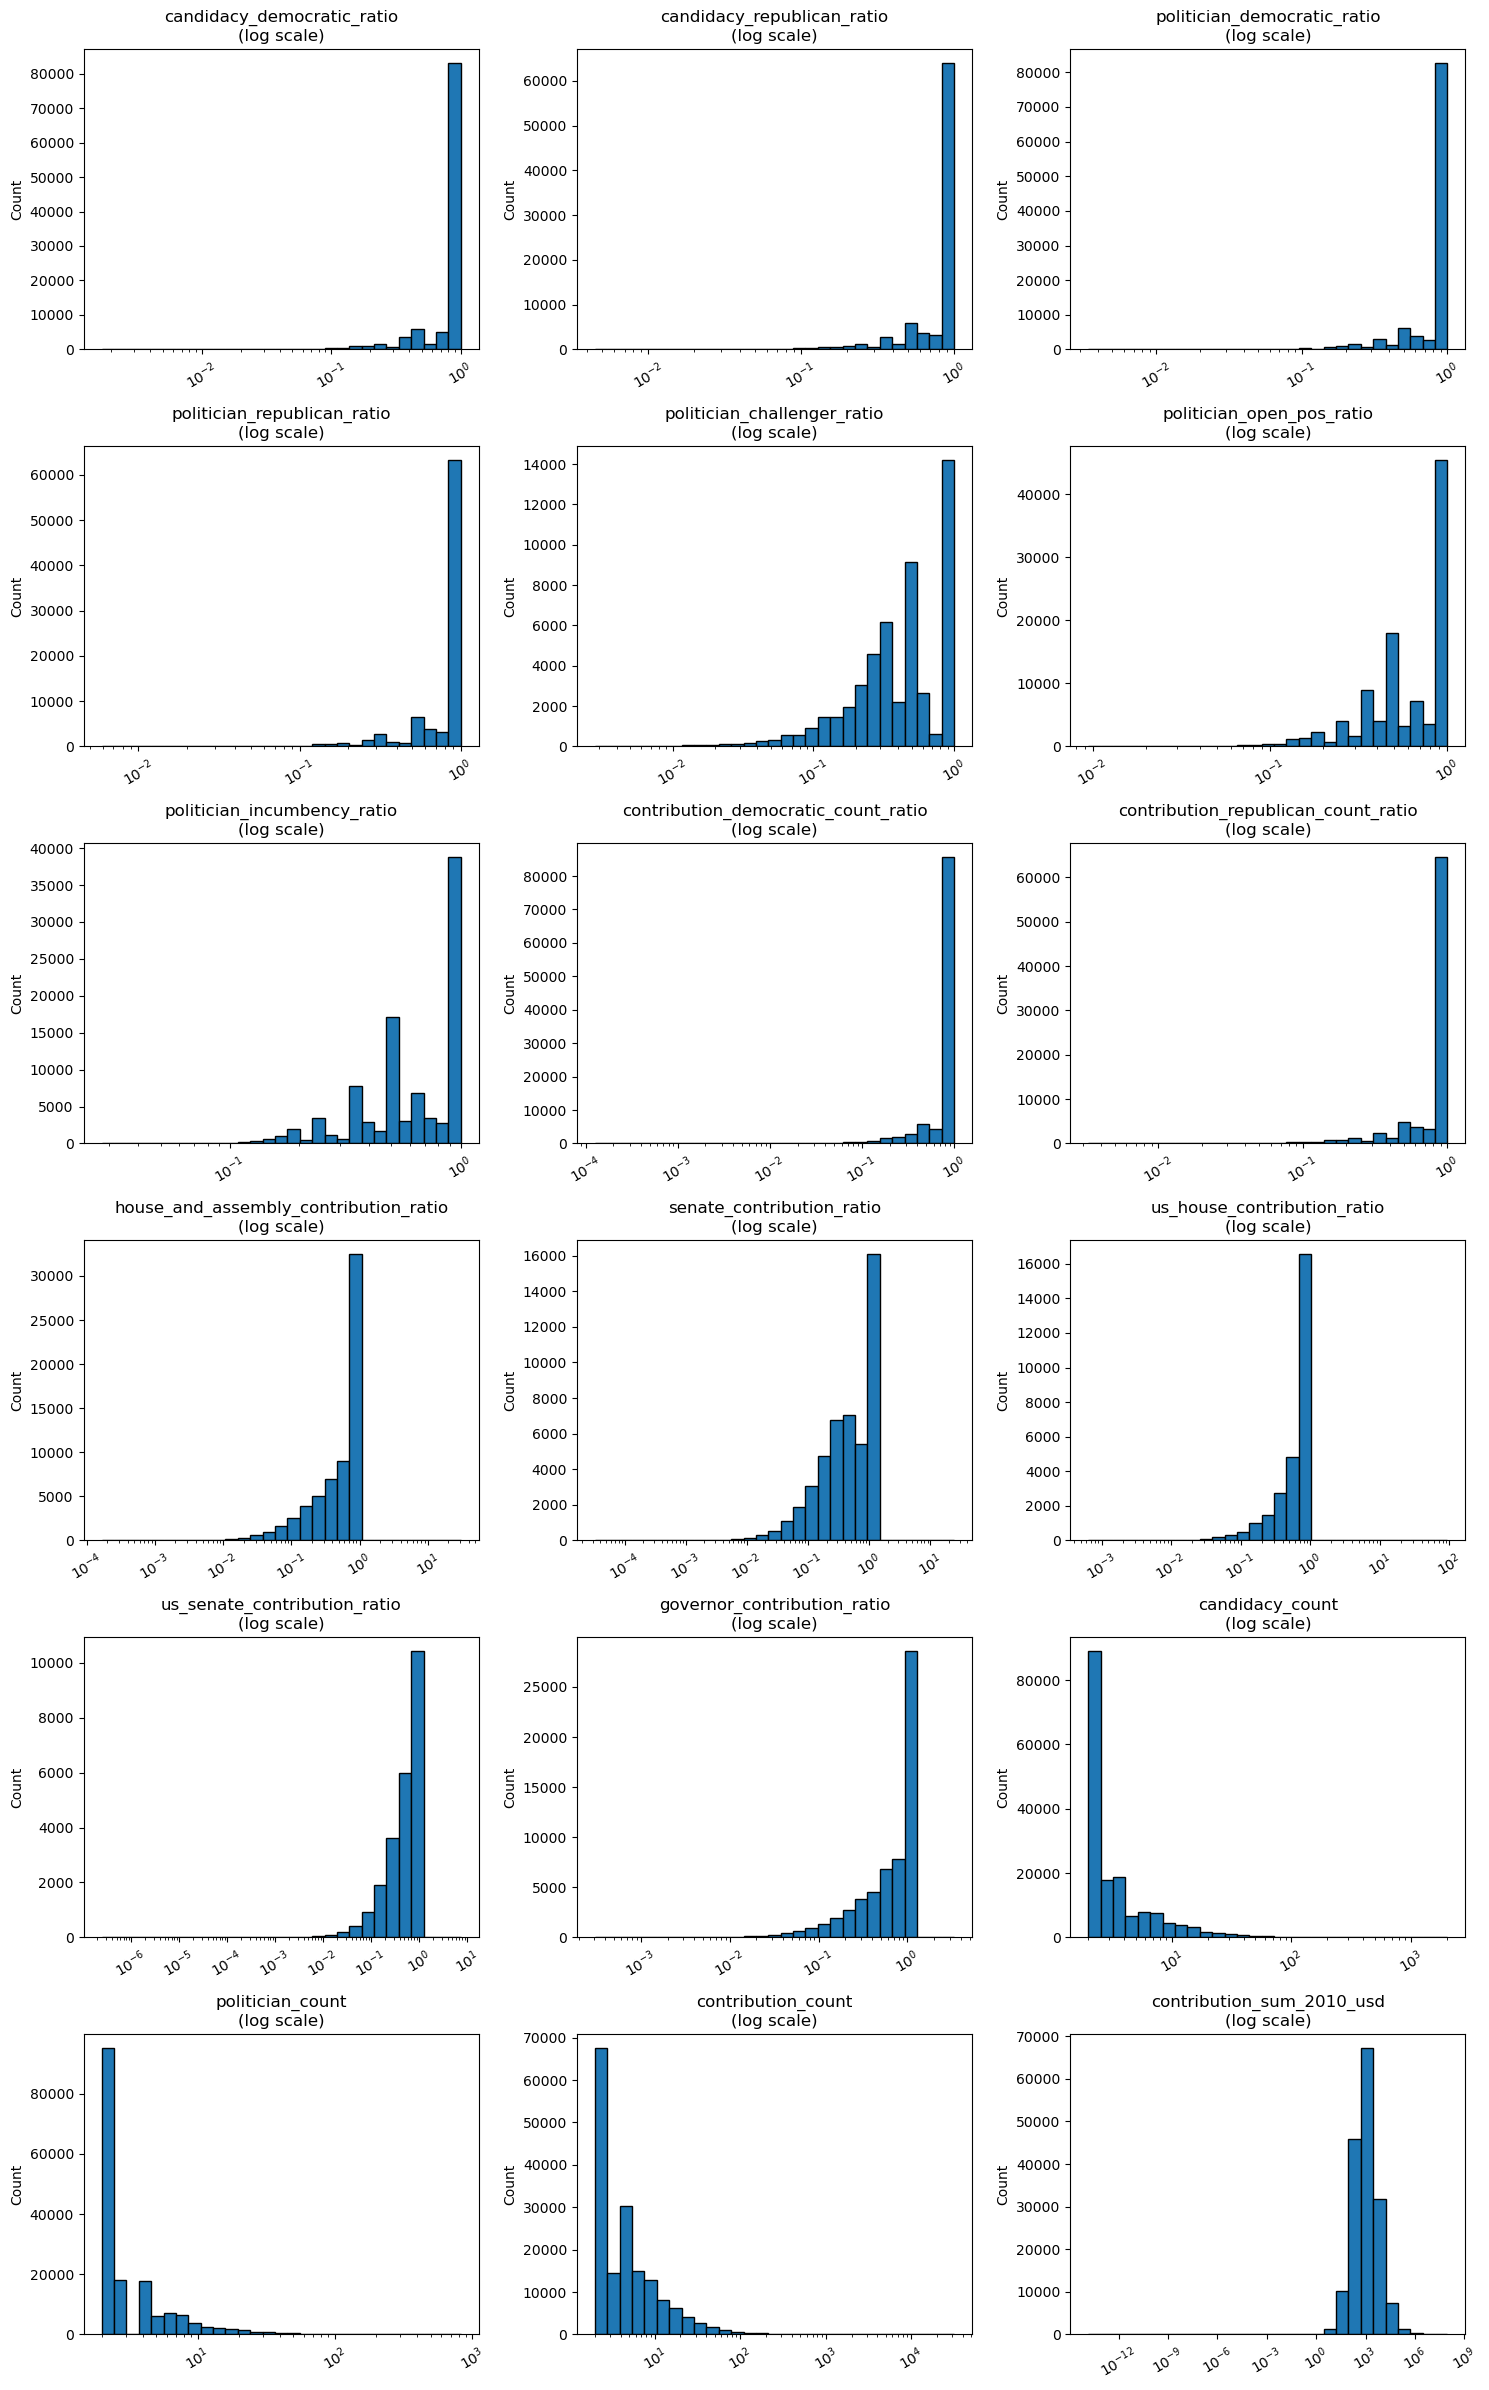

In [26]:

plot_histograms(train, ratio_total_cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)


## Treat ratio columns to fix skewness or zero and 1 inflated data

In [27]:
import numpy as np
import pandas as pd

THRESH = 0.10
target = "winner_ratio"

# ── 1) Correlation on raw ratios ───────────────────────────────────────
corr_df = train[ratio_cols + [target]].corr(method='spearman')
spearman = corr_df[target].abs().drop(target)

# pick those above threshold
selected_raw = spearman[spearman > THRESH].index.tolist()
print("Keeping these ratio_cols (|ρ| > 0.10):", selected_raw)

# ── 2) Engineer flags/logits only for selected ratios ──────────────────
EPS = 1e-4
def engineer_selected(df, selected):
    out = df.copy()
    for col in selected:
        out[f"{col}_is_zero"] = (out[col] <= 0).astype('int8')
        out[f"{col}_is_one"]  = (out[col] >= 1).astype('int8')
        # logit for all linear/tree/nn — adjust if you want only some
        clip = out[col].clip(EPS, 1-EPS)
        out[f"{col}_logit"] = np.log(clip / (1-clip))
    # drop **all** raw ratio columns
    out.drop(columns=ratio_cols, inplace=True)
    return out

train = engineer_selected(train, selected_raw)
test = engineer_selected(test, selected_raw)

selected_spearman = spearman[ spearman.abs() > THRESH ]\
                         .sort_values(ascending=False)

print("Selected ratio_cols with |Spearman ρ| >", THRESH)
print(selected_spearman.to_frame(name='spearman_rho'))


# ── 3) Drop any engineered columns from the unselected ratios ─────────
#    (shouldn’t be any, because engineer_selected only touches `selected_raw`)
#    but if you re‑ran on full set, you could do:
to_drop = []
for col in ratio_cols:
    if col not in selected_raw:
        to_drop += [c for c in train.columns if c.startswith(col)]
train.drop(columns=to_drop, inplace=True)


# ── 4) Now linear_df contains:
#    • flags and logits for only your important ratios
#    • all other original columns (categoricals + other numerics)

print(" \n\n","Final columns after ratio selection:")
print(train.columns.tolist())


Keeping these ratio_cols (|ρ| > 0.10): ['politician_challenger_ratio', 'politician_open_pos_ratio', 'politician_incumbency_ratio', 'governor_contribution_ratio']
Selected ratio_cols with |Spearman ρ| > 0.1
                             spearman_rho
politician_incumbency_ratio      0.488061
politician_challenger_ratio      0.319815
politician_open_pos_ratio        0.254705
governor_contribution_ratio      0.137031
 

 Final columns after ratio selection:
['state', 'contributor_type', 'winner_ratio', 'candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm', 'general_sector_new', 'poli

In [28]:
## Remove those columns from list
selected_ratio_cols = selected_spearman.index.tolist()

# 3) Compute which ratios to discard
discarded_ratio_cols = [c for c in ratio_cols if c not in selected_ratio_cols]
print("Discarding these ratio columns from train_num_vars:", discarded_ratio_cols)

# 4) Filter train_num_vars
train_num_vars = [c for c in train_num_vars if c not in discarded_ratio_cols]
test_num_vars = [col for col in test_num_vars if col not in discarded_ratio_cols]



Discarding these ratio columns from train_num_vars: ['candidacy_democratic_ratio', 'candidacy_republican_ratio', 'politician_democratic_ratio', 'politician_republican_ratio', 'contribution_democratic_count_ratio', 'contribution_republican_count_ratio', 'house_and_assembly_contribution_ratio', 'senate_contribution_ratio', 'us_house_contribution_ratio', 'us_senate_contribution_ratio']


In [29]:
import numpy as np
import pandas as pd

def create_feature_lists(df: pd.DataFrame,
                         target: str = "winner_ratio"):
    
    # 1) logit columns
    logit_vars = [c for c in df.columns if c.endswith("_logit")]

    # 2) binary‑flag columns
    binary_flag_vars = [c for c in df.columns
                        if c.endswith("_is_zero") or c.endswith("_is_one")]

    # 3) numeric columns (ints & floats)
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # 5) train_num_vars: all numeric except target, cat_vars, binary_flag_vars
    train_num_vars = [
        c for c in num_cols
        if c not in binary_flag_vars + [target]
    ]

    return {
        "logit_vars":       logit_vars,
        "binary_flag_vars": binary_flag_vars,
        "tar_var":          target,
        "train_num_vars":   train_num_vars
    }

# Example usage:
features = create_feature_lists(train)
features["cat_vars"] = cat_vars
print("Logit vars:      ", features["logit_vars"])
print("Binary flags:    ", features["binary_flag_vars"])
print("Categoricals:    ", features["cat_vars"])
print("Target:          ", features["tar_var"])
print("Numeric features:", features["train_num_vars"])



Logit vars:       ['politician_challenger_ratio_logit', 'politician_open_pos_ratio_logit', 'politician_incumbency_ratio_logit', 'governor_contribution_ratio_logit']
Binary flags:     ['politician_challenger_ratio_is_zero', 'politician_challenger_ratio_is_one', 'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one', 'politician_incumbency_ratio_is_zero', 'politician_incumbency_ratio_is_one', 'governor_contribution_ratio_is_zero', 'governor_contribution_ratio_is_one']
Categoricals:     ['state', 'contributor_type', 'general_sector_new']
Target:           winner_ratio
Numeric features: ['candidacy_count', 'contribution_count', 'politician_count', 'contribution_democratic_sum_2010_usd', 'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd', 'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm', 'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr', 'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_al

### Treat Network data columns

In [30]:
features["cat_vars"]

['state', 'contributor_type', 'general_sector_new']

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_35906/2570631980.py:26: RuntimeWarning: divide by zero encountered in log10
  edges = np.logspace(np.log10(low), np.log10(mx), bins)


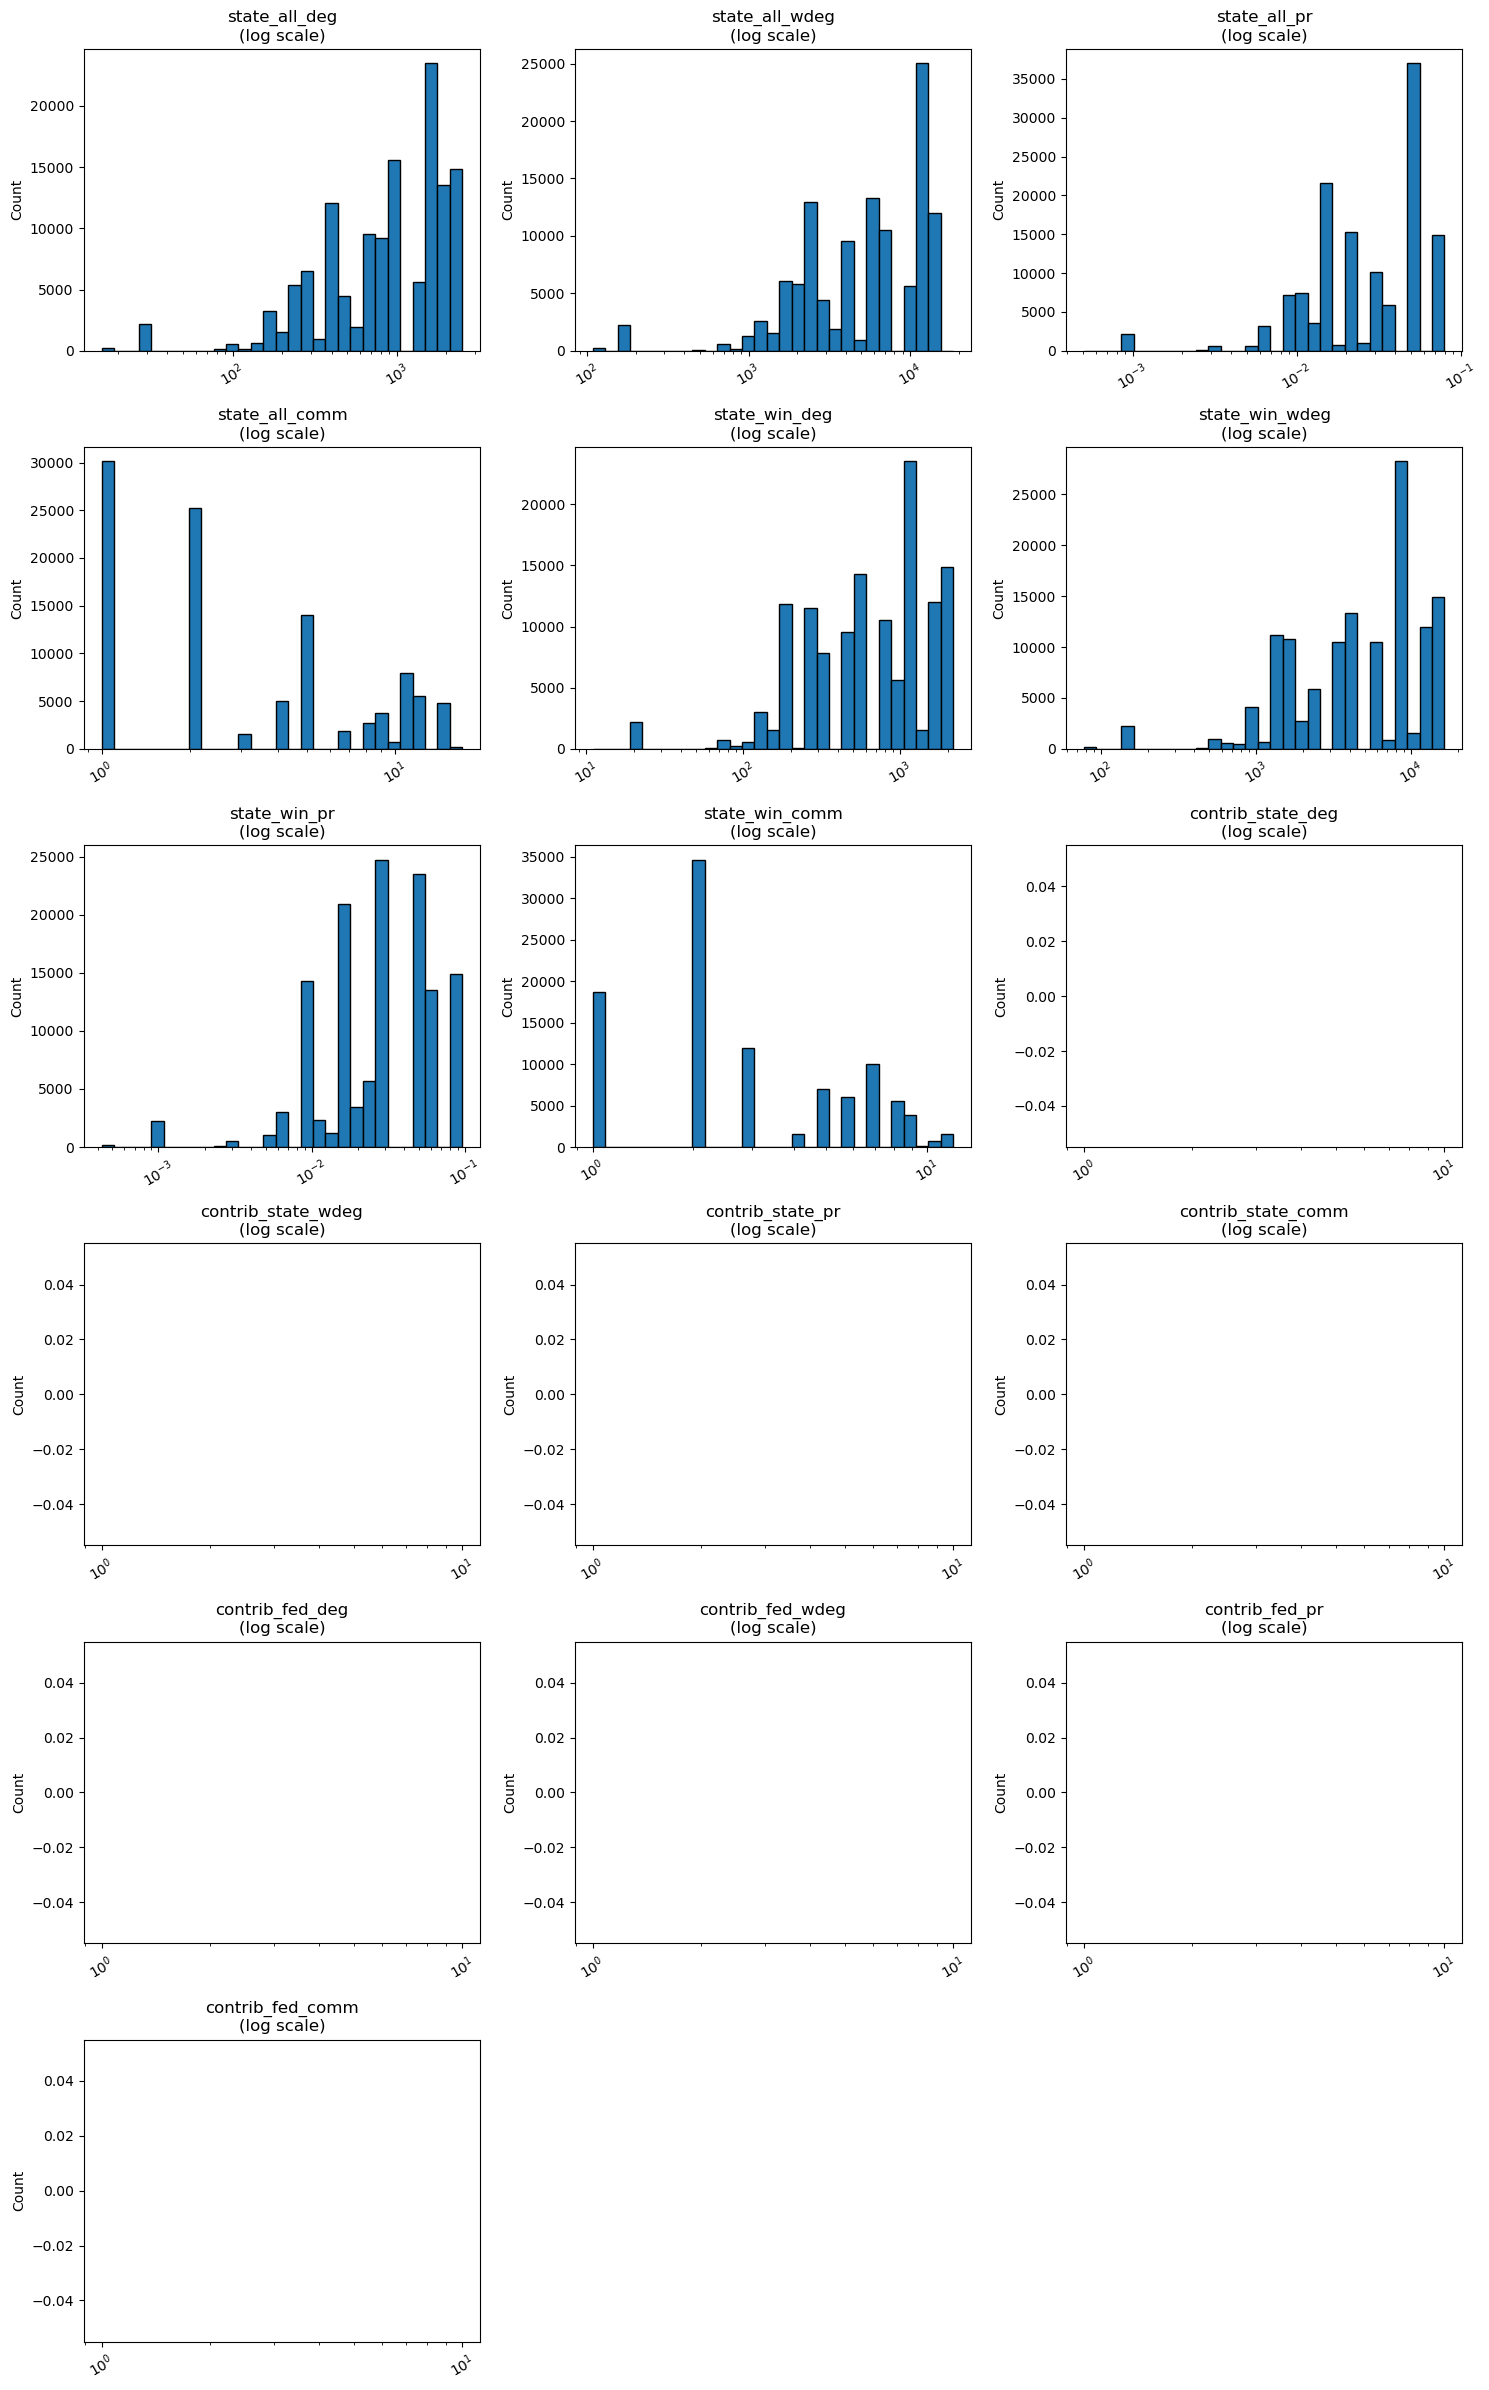

In [31]:

network_cols = [
    'state_all_deg', 'state_all_wdeg', 'state_all_pr', 'state_all_comm',
    'state_win_deg', 'state_win_wdeg', 'state_win_pr', 'state_win_comm',
    'contrib_state_deg', 'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
    'contrib_fed_deg',  'contrib_fed_wdeg',  'contrib_fed_pr',  'contrib_fed_comm'
]

plot_histograms(train, network_cols)


In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer



# ---------------------------------
# 2. Drop columns with zero variance
# ---------------------------------
non_constant = [c for c in network_cols if train[c].std(skipna=True) > 0]
print(f"Dropping {len(network_cols) - len(non_constant)} constant columns")

# ---------------------------------
# 3. Apply a skew‑reducing transform
#    a) log1p  (good for strictly‑positive features with many zeros)
#    b) Yeo‑Johnson (handles negatives too; uncomment if needed)
# ---------------------------------
X = train[non_constant].copy()

# a) log1p
X_log  = np.log1p(X)

# b) Yeo‑Johnson – uncomment if you have negatives
# pt     = PowerTransformer(method="yeo-johnson", standardize=False)
# X_log  = pd.DataFrame(pt.fit_transform(X), columns=non_constant, index=train.index)

# ---------------------------------
# 4. Correlation with the target
# ---------------------------------
y = train['winner_ratio']

pearson  = X_log.apply(lambda col: col.corr(y, method='pearson')).sort_values(ascending=False)
spearman = X.apply  (lambda col: col.corr(y, method='spearman')).sort_values(ascending=False)

print("\n=== Pearson (after log1p) ===")
print(pearson)

print("\n=== Spearman (rank‑based, raw values) ===")
print(spearman)


Dropping 8 constant columns

=== Pearson (after log1p) ===
state_win_comm    0.007294
state_all_comm    0.005211
state_all_wdeg   -0.014533
state_win_wdeg   -0.015299
state_all_deg    -0.016563
state_win_deg    -0.017559
state_win_pr     -0.032553
state_all_pr     -0.038107
dtype: float64

=== Spearman (rank‑based, raw values) ===
state_win_comm    0.010178
state_all_comm   -0.003357
state_all_deg    -0.012748
state_win_wdeg   -0.012795
state_win_deg    -0.013261
state_all_wdeg   -0.013273
state_win_pr     -0.015181
state_all_pr     -0.017983
dtype: float64


In [33]:
from sklearn.preprocessing import PowerTransformer

# 1) fit Yeo-Johnson
pt = PowerTransformer(method="yeo-johnson", standardize=False)
X_yeo = pd.DataFrame(pt.fit_transform(train[non_constant]),
                     columns=non_constant, index=train.index)

# 2) Pearson corr on Yeo‑Johnson
pearson_yeo = X_yeo.apply(lambda col: col.corr(train['winner_ratio'], method='pearson'))
print("Pearson after Yeo‑Johnson:\n", pearson_yeo.sort_values(ascending=False))


Pearson after Yeo‑Johnson:
 state_win_comm    0.004449
state_all_comm   -0.003177
state_all_wdeg   -0.029796
state_win_wdeg   -0.029854
state_win_deg    -0.030521
state_all_deg    -0.030768
state_win_pr     -0.041155
state_all_pr     -0.041959
dtype: float64


#### Dropping network related metrics, since they're found to be very less correlated with winner_ratio

In [34]:
train.drop(network_cols, axis=1, inplace= True)
test.drop(network_cols, axis=1, inplace= True)

In [35]:
for col in network_cols:
    features['train_num_vars'].remove(col)
    # features['test_num_vars'].remove(col)

In [36]:
train['contribution_total_sum_2010_usd'] = train['contribution_democratic_sum_2010_usd'] + train['contribution_republican_sum_2010_usd']
test['contribution_total_sum_2010_usd'] = test['contribution_democratic_sum_2010_usd'] + test['contribution_republican_sum_2010_usd']

features['train_num_vars'].append("contribution_total_sum_2010_usd")
# features['test_num_vars'].append("contribution_total_sum_2010_usd")

In [37]:
def dropZeroRecords(df, cols):
    for col in cols:
        print(f'# Zero records in {col} are {df[df[col]==0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_total_sum_2010_usd"]
train = dropZeroRecords(train, cols)
test = dropZeroRecords(train, cols)

# Zero records in contribution_total_sum_2010_usd are (181, 23)
# Zero records in contribution_total_sum_2010_usd are (0, 23)


In [38]:
def dropNegRecords(df, col):
    for col in cols:
        print(f'# Neg records in {col} are {df[df[col]<0 ].shape}')
        df = df[df[col]>0]
    return df

cols = ["contribution_democratic_sum_2010_usd", "contribution_republican_sum_2010_usd"]
train = dropNegRecords(train, cols)
print("\n\n")
test = dropNegRecords(test, cols)

# Neg records in contribution_democratic_sum_2010_usd are (23, 23)
# Neg records in contribution_republican_sum_2010_usd are (36, 23)



# Neg records in contribution_democratic_sum_2010_usd are (23, 23)
# Neg records in contribution_republican_sum_2010_usd are (36, 23)


In [39]:
import numpy as np
import pandas as pd

money_sums = [
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
]

def add_share_features(df, money_sums, eps=1e-6):
    # 1) raw sums → log (we dropped total_sum zeros upstream)
    for col in money_sums:
        df[f"{col}_log"] = np.log1p(df[col])
    
    # 2) zero‐flags only for dem & rep sums
    for col in money_sums[:-1]:  # skip the total_sum
        df[f"{col}_is_zero"] = (df[col] == 0).astype(int)

    # 3) compute share ratios directly
    df["dem_sum_ratio"] = (
        df["contribution_democratic_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )
    df["rep_sum_ratio"] = (
        df["contribution_republican_sum_2010_usd"]
        / df["contribution_total_sum_2010_usd"]
    )

    # 4) flags for ratio boundaries
    df["dem_sum_ratio_is_zero"] = (df["dem_sum_ratio"] == 0).astype(int)
    df["dem_sum_ratio_is_one"]  = (df["dem_sum_ratio"] == 1).astype(int)
    df["rep_sum_ratio_is_zero"] = (df["rep_sum_ratio"] == 0).astype(int)
    df["rep_sum_ratio_is_one"]  = (df["rep_sum_ratio"] == 1).astype(int)

    # 5) logit‐transform the ratios (safe since denom≠0)
    for col in ["dem_sum_ratio", "rep_sum_ratio"]:
        r = df[col].clip(eps, 1 - eps)
        df[f"{col}_logit"] = np.log(r / (1 - r))

    return df

# Apply to both train and test (after you’ve dropped total_sum == 0 rows)
train = add_share_features(train, money_sums)
test  = add_share_features(test,  money_sums)


In [40]:
features['cat_vars']

['state', 'contributor_type', 'general_sector_new']

In [41]:
# Linear or GLM (no penalty)
linear_keep = [
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio_logit",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

# Linear with Ridge/Lasso
linear_keep_penalised = [
    # 1) magnitude of money (compressed)
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

     # 2) wasn’t zero? (flag)
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",

    # 3) partisan dollar share (dem only), logit‐transformed
    "dem_sum_ratio_logit",
    
]

# Tree‑based
tree_keep = [
    # 1. raw sums — trees love them
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",
    "contribution_total_sum_2010_usd",
    # 2. raw share ratio
    "dem_sum_ratio",
]

# Neural network (after StandardScaler)
nn_keep = [
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",
    "dem_sum_ratio",
    "dem_sum_ratio_is_zero", "dem_sum_ratio_is_one",
    "contribution_democratic_sum_2010_usd_is_zero",
    "contribution_republican_sum_2010_usd_is_zero",
]

######### Linear Models ########
# features_keep_penalised = create_feature_lists(train)
# features["train_num_vars"] = [c for c in nn_keep if c in train.columns]
# features["train_num_vars"] += [col for col in features_keep_penalised["train_num_vars"]
#                                if col not in features["train_num_vars"]]

# features["binary_flag_vars"] += [col for col in features_keep_penalised["binary_flag_vars"]
#                                if col not in features["binary_flag_vars"]]

# features["logit_vars"] += [col for col in features_keep_penalised["logit_vars"]
#                                if col not in features["logit_vars"]]

####### Old logic
features_tree = create_feature_lists(train)
features["train_num_vars"] += [col for col in features_tree["train_num_vars"]
                               if col not in features["train_num_vars"]]

features["binary_flag_vars"] += [col for col in features_tree["binary_flag_vars"]
                               if col not in features["binary_flag_vars"]]

features["logit_vars"] += [col for col in features_tree["logit_vars"]
                               if col not in features["logit_vars"]]


In [42]:
## Dropping redundance columns

def drop_extra_cols(df, features, cols):
    features["train_num_vars"] = [c for c in features["train_num_vars"] if c not in cols]
    df.drop(columns=[c for c in cols if c in df.columns], inplace=True)
    return df, features


cols = ["dem_sum_ratio", "rep_sum_ratio"]
train, features = drop_extra_cols(train, features, cols)
test, features = drop_extra_cols(test, features, cols)  

In [43]:
'dem_sum_ratio' in features['train_num_vars']

False

In [44]:
train.columns

Index(['state', 'contributor_type', 'winner_ratio', 'candidacy_count',
       'contribution_count', 'politician_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'general_sector_new', 'politician_challenger_ratio_is_zero',
       'politician_challenger_ratio_is_one',
       'politician_challenger_ratio_logit',
       'politician_open_pos_ratio_is_zero', 'politician_open_pos_ratio_is_one',
       'politician_open_pos_ratio_logit',
       'politician_incumbency_ratio_is_zero',
       'politician_incumbency_ratio_is_one',
       'politician_incumbency_ratio_logit',
       'governor_contribution_ratio_is_zero',
       'governor_contribution_ratio_is_one',
       'governor_contribution_ratio_logit', 'contribution_total_sum_2010_usd',
       'contribution_democratic_sum_2010_usd_log',
       'contribution_republican_sum_2010_usd_log',
       'contribution_total_sum_2010_usd_log',
       'contribution_demo

In [45]:
set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) -set(train.columns)

set()

In [46]:
set(train.columns) - set(features["train_num_vars"] + features["cat_vars"] + features["binary_flag_vars"] ) 

{'winner_ratio'}

In [47]:
features['train_num_vars']

['candidacy_count',
 'contribution_count',
 'politician_count',
 'contribution_democratic_sum_2010_usd',
 'contribution_republican_sum_2010_usd',
 'contribution_sum_2010_usd',
 'politician_challenger_ratio_logit',
 'politician_open_pos_ratio_logit',
 'politician_incumbency_ratio_logit',
 'governor_contribution_ratio_logit',
 'contribution_total_sum_2010_usd',
 'contribution_democratic_sum_2010_usd_log',
 'contribution_republican_sum_2010_usd_log',
 'contribution_total_sum_2010_usd_log',
 'dem_sum_ratio_logit',
 'rep_sum_ratio_logit']

### Keep only relevant columns and drop redundant columns

In [48]:
features['train_num_vars'] = tree_num_keep = [
    "candidacy_count",
    "contribution_count",
    "politician_count",
    "contribution_total_sum_2010_usd",      # raw magnitude
    "politician_challenger_ratio_logit",
    "politician_open_pos_ratio_logit",
    "politician_incumbency_ratio_logit",
    "governor_contribution_ratio_logit",
    "dem_sum_ratio_logit"
]
cols_to_drop = [
    # Raw party-specific money sums — redundant with total + ratio
    "contribution_democratic_sum_2010_usd",
    "contribution_republican_sum_2010_usd",

    # Duplicate total (if contribution_total_sum_2010_usd already exists)
    "contribution_sum_2010_usd",

    # Log-transformed money sums — redundant for trees
    "contribution_democratic_sum_2010_usd_log",
    "contribution_republican_sum_2010_usd_log",
    "contribution_total_sum_2010_usd_log",

    # Perfectly anti-correlated with dem_sum_ratio_logit
    "rep_sum_ratio_logit"
]

train.drop(columns=cols_to_drop, errors="ignore", inplace=True)
test.drop(columns=cols_to_drop, errors="ignore", inplace=True)


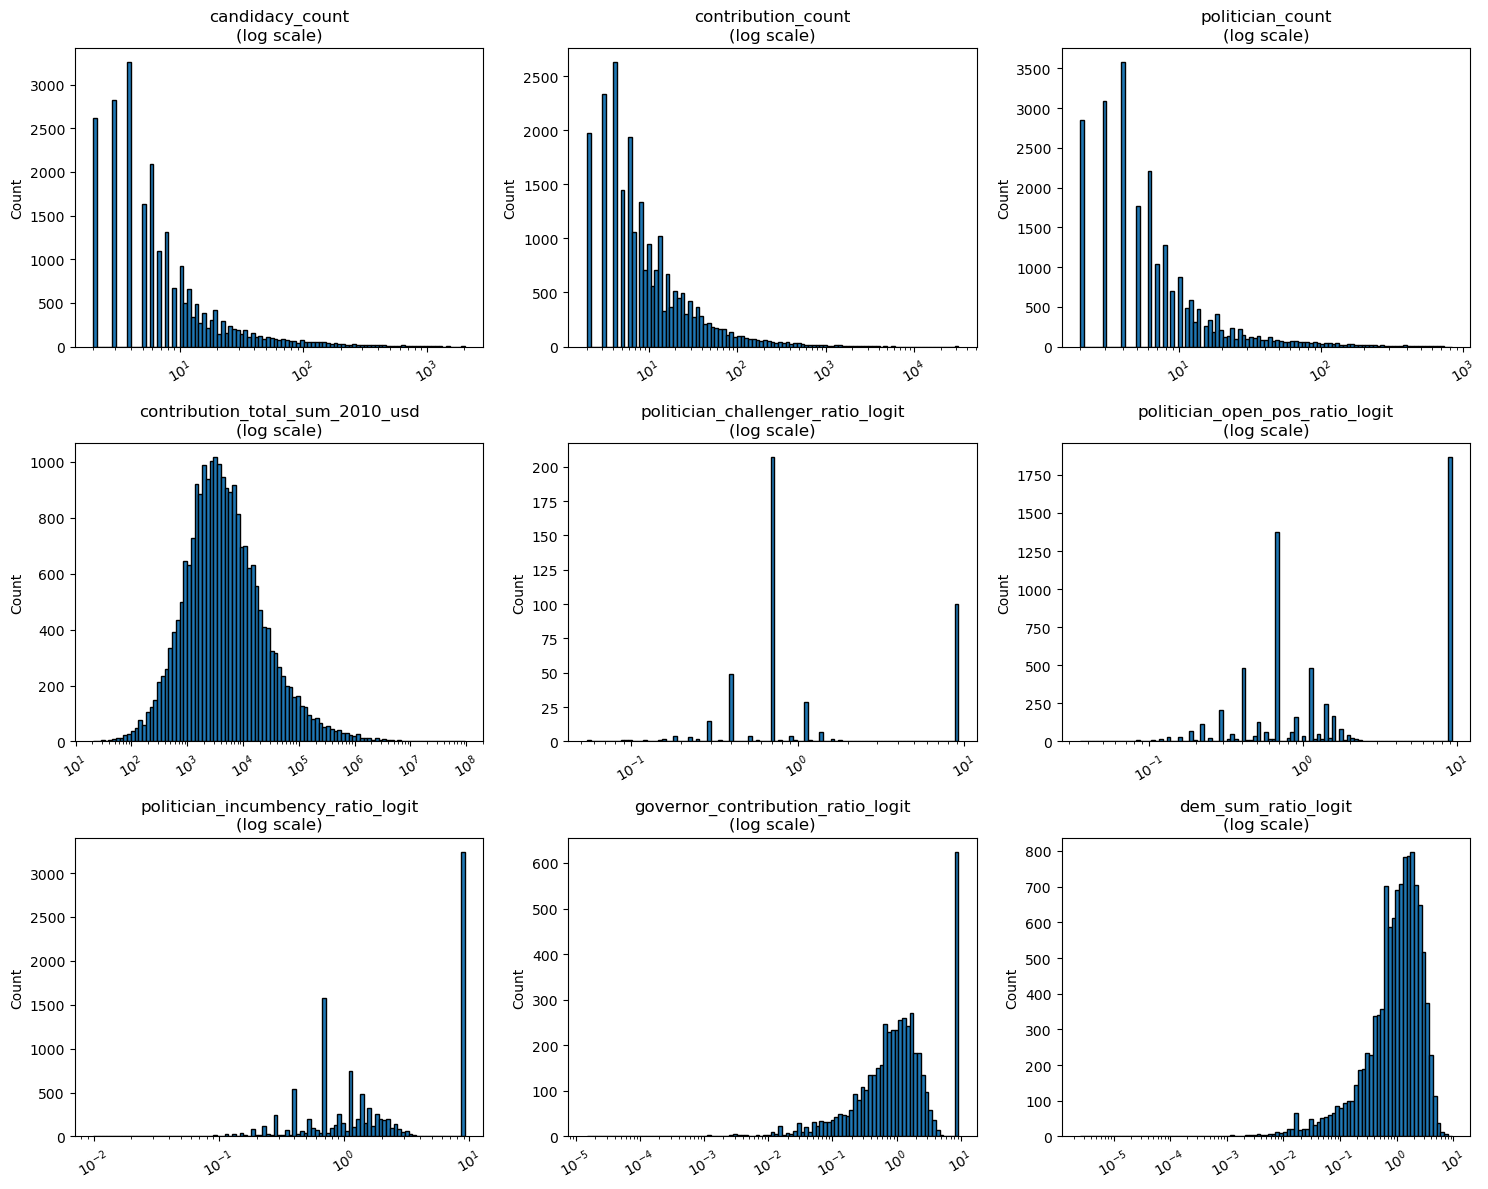

In [49]:


plot_histograms(train, features['train_num_vars'], bins=100, cols_per_row=3, figsize=(15, 4), wide_range_factor=100)

## Check skewness in features

In [50]:
train_bkp = train.copy()

In [51]:
features['train_num_vars']

['candidacy_count',
 'contribution_count',
 'politician_count',
 'contribution_total_sum_2010_usd',
 'politician_challenger_ratio_logit',
 'politician_open_pos_ratio_logit',
 'politician_incumbency_ratio_logit',
 'governor_contribution_ratio_logit',
 'dem_sum_ratio_logit']

In [52]:
import numpy as np
from scipy.stats import skew


# 2) Compute & print pre‑log1p skewness
print("Pre‑log1p skewness:")
pre = {c: skew(train[c].dropna()) for c in features['train_num_vars']}
for c,v in pre.items():
    print(f"  {c:20s}  {v:6.3f}")



Pre‑log1p skewness:
  candidacy_count       10.931
  contribution_count    94.286
  politician_count       8.328
  contribution_total_sum_2010_usd  107.048
  politician_challenger_ratio_logit   0.635
  politician_open_pos_ratio_logit   0.059
  politician_incumbency_ratio_logit  -0.067
  governor_contribution_ratio_logit   0.550
  dem_sum_ratio_logit    0.104


### Handle outleirs, if needed

In [53]:
# cap = train["contribution_count"].quantile(0.99)
# train["contribution_count"] = train["contribution_count"].clip(upper=cap)
# test ["contribution_count"] = test["contribution_count"].clip(upper=cap)


### Drop actual contribution_sum columns for both REP and DEM

In [54]:
#### no need to drop for this experiment

# cols_to_drop = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_total_sum_2010_usd']

# train, features = drop_extra_cols(train, features, cols_to_drop)
# test, features = drop_extra_cols(test, features, cols_to_drop)

## Check VIF among numerical columns

In [55]:
# 2) Compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train[features['train_num_vars']].dropna().astype(float)
vif_data = pd.DataFrame({
    "feature": features['train_num_vars'], 
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("\nVariance Inflation Factors:")
print(vif_data.sort_values("VIF", ascending=False))


Variance Inflation Factors:
                             feature        VIF
0                    candidacy_count  21.147263
2                   politician_count  19.312242
1                 contribution_count   9.668727
3    contribution_total_sum_2010_usd   7.037514
5    politician_open_pos_ratio_logit   2.678364
6  politician_incumbency_ratio_logit   2.340290
7  governor_contribution_ratio_logit   1.933042
4  politician_challenger_ratio_logit   1.634417
8                dem_sum_ratio_logit   1.007061


## Check correlation of numerical variables with target variable

In [56]:

# Calculate correlations
correlations = train[features['train_num_vars']].corrwith(train['winner_ratio']).sort_values(key=abs, ascending=False)

# Display top correlations
print("🔍 Correlation of Predictors with winner_ratio:")
print(correlations)

🔍 Correlation of Predictors with winner_ratio:
politician_incumbency_ratio_logit    0.536305
politician_open_pos_ratio_logit     -0.366763
politician_challenger_ratio_logit   -0.257657
governor_contribution_ratio_logit   -0.231964
politician_count                     0.148835
candidacy_count                      0.134791
contribution_count                   0.062597
dem_sum_ratio_logit                 -0.061244
contribution_total_sum_2010_usd      0.026058
dtype: float64


In [57]:
# Compute Spearman correlation between each train_num_var and the target
spearman = train[features["train_num_vars"]].apply(
    lambda col: col.corr(train["winner_ratio"], method="spearman")
).sort_values(ascending=False)

spearman


politician_incumbency_ratio_logit    0.597792
contribution_total_sum_2010_usd      0.216085
candidacy_count                      0.186878
contribution_count                   0.185448
politician_count                     0.153317
dem_sum_ratio_logit                 -0.068200
governor_contribution_ratio_logit   -0.245674
politician_challenger_ratio_logit   -0.292907
politician_open_pos_ratio_logit     -0.436844
dtype: float64

### Below column is found to be least correlated with tar var

In [58]:
"dem_sum_ratio_logit" in train.columns

True

In [59]:
to_drop = ["dem_sum_ratio_logit"]
train.drop(columns=to_drop, inplace=True, errors="ignore")
test .drop(columns=to_drop, inplace=True, errors="ignore")

features['train_num_vars'].remove(to_drop[0])

In [60]:
"dem_sum_ratio_logit" in train.columns

False

In [61]:
# features['train_num_vars'].remove("dem_sum_ratio_logit")

In [62]:
"dem_sum_ratio_logit" in features['train_num_vars']

False

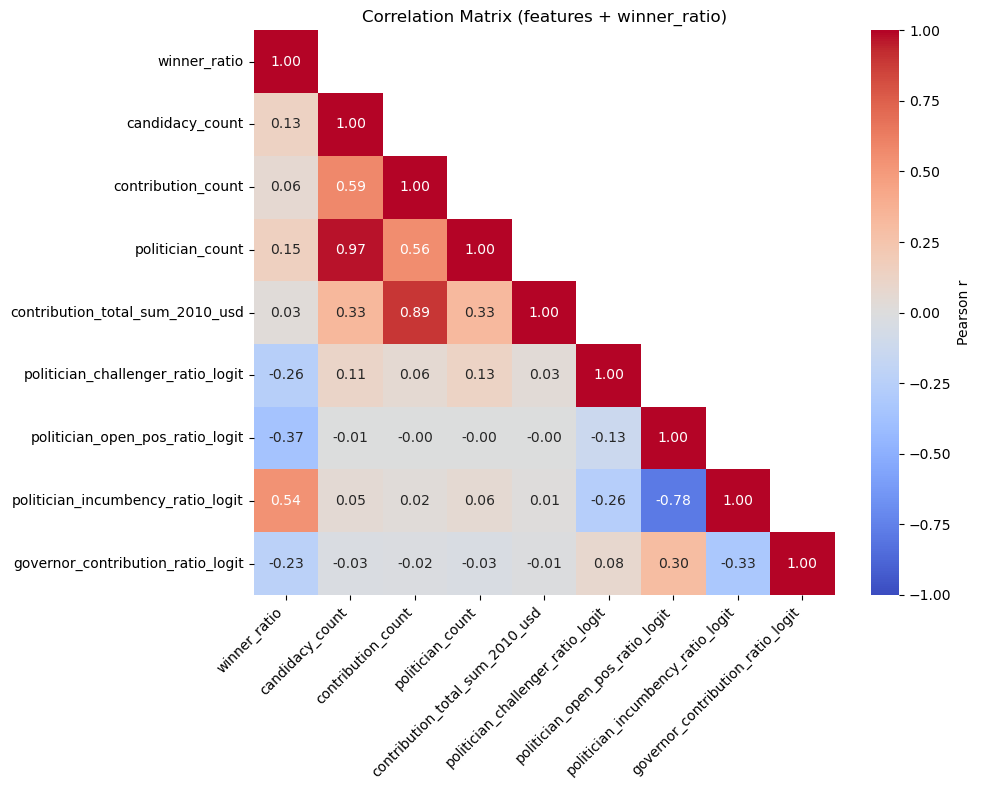

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Build list with winner_ratio first so its correlations sit on the diagonal
vars_for_corr = [features["tar_var"]] + features["train_num_vars"]

# 2) Compute Pearson correlation matrix
corr = train[vars_for_corr].corr()

# 3) Create a mask for the upper triangle (k=1 masks above the diagonal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# 4) Plot heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,         # show the correlation coefficients
    fmt=".2f",          # two decimal places
    cmap="coolwarm",
    vmin=-1, vmax=1,
    cbar_kws={"label": "Pearson r"}
)

# 5) Tidy up labels
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Matrix (features + winner_ratio)")
plt.tight_layout()
plt.show()


### Pipeline to split data, encode categorical columns, and then model building

In [64]:
train_bkp = train.copy()

GBM raw  val MSE = 0.0417


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Bernoulli‑blend  val MSE = 0.0412
Platt‑scaled  val MSE = 0.0417

Best on validation: blend


/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_35906/170783116.py:131: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cal = df.groupby("bin").mean().reset_index()


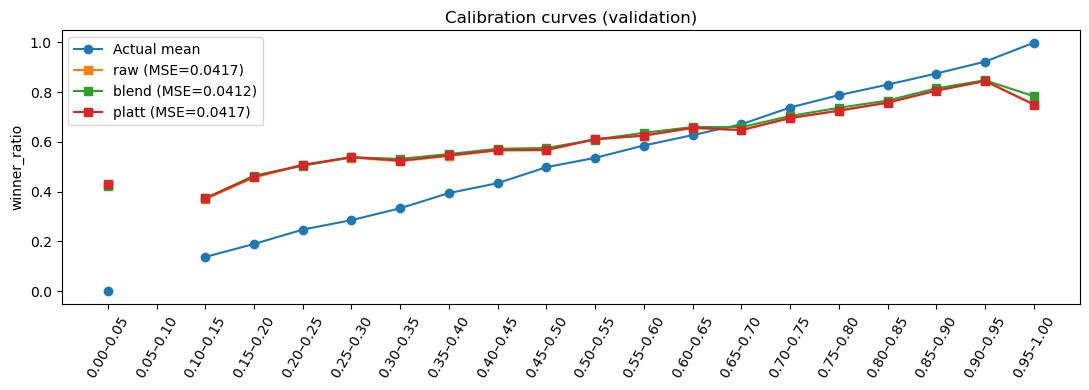

📦  saved → blend_pipeline.pkl


In [65]:
# ╭───────────────────────────────────────────────────────────────╮
# │ A · GBM baseline (weighted)                                   │
# ╰───────────────────────────────────────────────────────────────╯
import time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.linear_model    import LogisticRegression, LinearRegression
from sklearn.isotonic        import IsotonicRegression
from scipy.special           import expit, logit

train  = train_bkp.copy()
y_ratio = train.pop("winner_ratio").to_numpy()
X       = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
        X, y_ratio, test_size=.20, random_state=42)

trials_tr = X_tr["politician_count"].to_numpy().clip(1)
trials_val= X_val["politician_count"].to_numpy().clip(1)

wins_tr  = np.round(y_tr_ratio * trials_tr ).astype(int)
wins_val = np.round(y_val_ratio* trials_val).astype(int)

elogit = lambda w,n: np.log(((w+0.5)/(n+1))/(1-(w+0.5)/(n+1)))
y_tr_elog  = elogit(wins_tr,  trials_tr)
y_val_elog = elogit(wins_val, trials_val)

log1p = FunctionTransformer(np.log1p, validate=False)
pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
        ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
                 ["politician_count"])
], sparse_threshold=0.3)

gb_best = GradientBoostingRegressor(random_state=42,
                                    n_estimators = 300,
                                    learning_rate= .05,
                                    max_depth    = 4,
                                    subsample    = .7)
pipe_gb = Pipeline([("pre", pre), ("gbm", gb_best)])
pipe_gb.fit(X_tr, y_tr_elog, gbm__sample_weight = trials_tr)

elogit_hat_val = pipe_gb.predict(X_val)
elogit_hat_tr  = pipe_gb.predict(X_tr)
prob_val_raw   = expit(elogit_hat_val)
prob_tr_raw    = expit(elogit_hat_tr)

mse_raw = mean_squared_error(y_val_ratio, prob_val_raw)
print(f"GBM raw  val MSE = {mse_raw:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ B · Bernoulli‑head blending                                   │
# ╰───────────────────────────────────────────────────────────────╯
is_zero_tr = (y_tr_ratio==0).astype(int)
is_one_tr  = (y_tr_ratio==1).astype(int)
is_zero_val= (y_val_ratio==0).astype(int)
is_one_val = (y_val_ratio==1).astype(int)

clf0 = Pipeline([("pre", pre),
                 ("logreg", LogisticRegression(max_iter=10_000))])
clf1 = Pipeline([("pre", pre),
                 ("logreg", LogisticRegression(max_iter=10_000))])

# train only on extremes for the classifiers
mask0 = (y_tr_ratio==0) | (y_tr_ratio>0)   # all rows needed, labels 0/1
mask1 = (y_tr_ratio==1) | (y_tr_ratio<1)
clf0.fit(X_tr, is_zero_tr)
clf1.fit(X_tr, is_one_tr)

p0_val = clf0.predict_proba(X_val)[:,1]
p1_val = clf1.predict_proba(X_val)[:,1]
p0_tr  = clf0.predict_proba(X_tr)[:,1]
p1_tr  = clf1.predict_proba(X_tr)[:,1]

# mask interior rows for regression
mask_tr_int = (y_tr_ratio>0) & (y_tr_ratio<1)
mask_val_int= (y_val_ratio>0) & (y_val_ratio<1)

gb_int = Pipeline([("pre", pre),
                   ("gbm", GradientBoostingRegressor(
                           random_state=42, n_estimators=300,
                           learning_rate=.05, max_depth=4, subsample=.7))])
gb_int.fit(X_tr[mask_tr_int], y_tr_ratio[mask_tr_int],
           gbm__sample_weight = trials_tr[mask_tr_int])

r_val = gb_int.predict(X_val)
r_tr  = gb_int.predict(X_tr)

# blend
blend_val = p1_val + (1-p0_val-p1_val) * r_val
blend_tr  = p1_tr  + (1-p0_tr -p1_tr ) * r_tr
mse_blend = mean_squared_error(y_val_ratio, blend_val)
print(f"Bernoulli‑blend  val MSE = {mse_blend:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ C · Platt (sigmoid) scaling                                   │
# ╰───────────────────────────────────────────────────────────────╯
# map elogit(pred)  →  elogit(actual)   via linear regression
z_pred = logit(np.clip(prob_val_raw, 1e-6, 1-1e-6))
z_true = elogit(wins_val, trials_val)          # same elogit as earlier

lin = LinearRegression().fit(z_pred.reshape(-1,1), z_true)
a,b = lin.coef_[0], lin.intercept_
prob_val_platt = expit(a*z_pred + b)
prob_tr_platt  = expit(a*logit(np.clip(prob_tr_raw,1e-6,1-1e-6)) + b)

mse_platt = mean_squared_error(y_val_ratio, prob_val_platt)
print(f"Platt‑scaled  val MSE = {mse_platt:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ D · Compare & plot                                            │
# ╰───────────────────────────────────────────────────────────────╯
mse_dict = {"raw":mse_raw, "blend":mse_blend, "platt":mse_platt}
best_key = min(mse_dict, key=mse_dict.get)
print("\nBest on validation:", best_key)

edges = np.linspace(0,1,21); labels=[f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]
df = pd.DataFrame({"actual":y_val_ratio,
                   "raw":prob_val_raw,
                   "blend":blend_val,
                   "platt":prob_val_platt})
df["bin"] = pd.cut(df.actual, bins=edges, labels=labels, include_lowest=True)
cal = df.groupby("bin").mean().reset_index()

plt.figure(figsize=(11,4))
plt.plot(cal.bin, cal.actual, marker='o', label="Actual mean")
for key,c in [("raw","tab:orange"),("blend","tab:green"),("platt","tab:red")]:
    plt.plot(cal.bin, cal[key], marker='s', label=f"{key} (MSE={mse_dict[key]:.4f})", c=c)
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title("Calibration curves (validation)"); plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ E · Save best pipeline                                        │
# ╰───────────────────────────────────────────────────────────────╯
if best_key=="raw":
    best_model = pipe_gb
elif best_key=="blend":
    class BlendWrapper:
        def __init__(self, clf0, clf1, reg):
            self.clf0,self.clf1,self.reg = clf0,clf1,reg
        def predict(self, X):
            p0 = self.clf0.predict_proba(X)[:,1]
            p1 = self.clf1.predict_proba(X)[:,1]
            r  = self.reg.predict(X)
            return p1 + (1-p0-p1)*r
    best_model = BlendWrapper(clf0, clf1, gb_int)
else:  # platt
    class PlattWrapper:
        def __init__(self, pipe, a, b):
            self.pipe, self.a, self.b = pipe, a, b
        def predict(self, X):
            p = expit(self.pipe.predict(X))
            return expit(self.a*logit(np.clip(p,1e-6,1-1e-6))+self.b)
    best_model = PlattWrapper(pipe_gb, a, b)

joblib.dump(best_model, f"{best_key}_pipeline.pkl")
print(f"📦  saved → {best_key}_pipeline.pkl")


In [67]:
train = train_bkp.copy()

In [73]:
# ╭───────────────────────────────────────────────────────────────╮
# │ 0 · IMPORTS                                                   │
# ╰───────────────────────────────────────────────────────────────╯
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from xgboost                 import XGBRegressor
from scipy.special           import expit, logit

# ╭───────────────────────────────────────────────────────────────╮
# │ 1 · DATA + E‑LOGIT                                           │
# ╰───────────────────────────────────────────────────────────────╯
train = train_bkp.copy()
y_ratio = train.pop("winner_ratio").to_numpy()
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
    X, y_ratio, test_size=.20, random_state=42)

trials_tr = X_tr["politician_count"].to_numpy().clip(1)
trials_val= X_val["politician_count"].to_numpy().clip(1)

elog = lambda w,n: np.log(((w+0.5)/(n+1))/(1-(w+0.5)/(n+1)))
wins_tr  = np.round(y_tr_ratio * trials_tr).astype(int)
wins_val = np.round(y_val_ratio* trials_val).astype(int)
y_tr_elog, y_val_elog = elog(wins_tr, trials_tr), elog(wins_val, trials_val)

log1p = FunctionTransformer(np.log1p, validate=False)
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
             ["politician_count"])
], sparse_threshold=0.3)


rf blend  val MSE = 0.0839


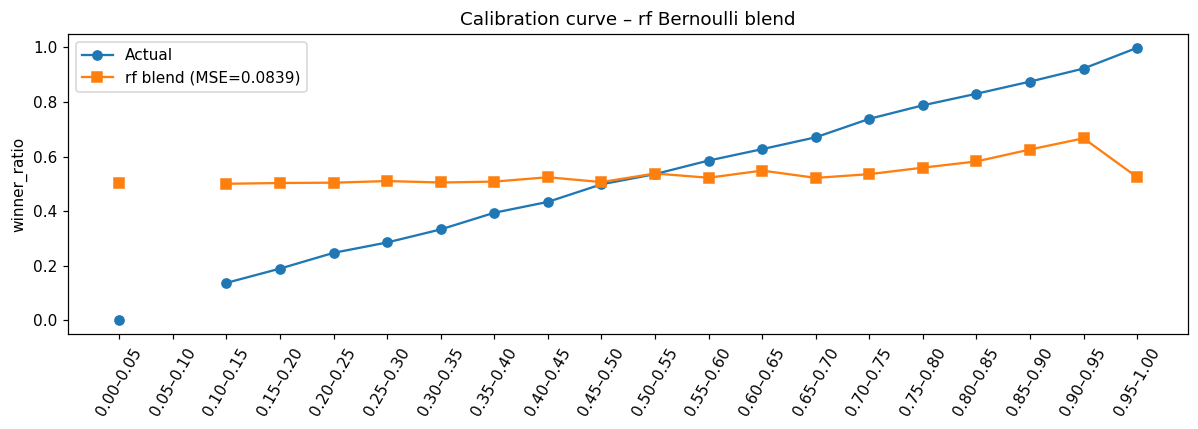

📦  saved → bernoulli_ rf _pipeline.pkl


In [74]:

# ╭───────────────────────────────────────────────────────────────╮
# │ 2 · choose interior regressor                                 │
# ╰───────────────────────────────────────────────────────────────╯
REG_NAME = "rf"          # "rf" | "gbm" | "xgb"

if REG_NAME=="rf":
    reg_int = RandomForestRegressor(
        n_estimators=500, max_depth=None,
        min_samples_leaf=2, n_jobs=-1, random_state=42)
elif REG_NAME=="xgb":
    reg_int = XGBRegressor(
        n_estimators=800, learning_rate=0.05,
        max_depth=6, subsample=0.8, colsample_bytree=0.8,
        objective="reg:squarederror",
        n_jobs=-1, random_state=42)
else:  # gbm baseline
    reg_int = GradientBoostingRegressor(
        n_estimators=300, learning_rate=.05,
        max_depth=4, subsample=.7, random_state=42)

# wrapped with preprocessing
reg_int_pipe = Pipeline([("pre", pre), ("reg", reg_int)])

# ╭───────────────────────────────────────────────────────────────╮
# │ 3 · logistic heads (0 / 1)                                    │
# ╰───────────────────────────────────────────────────────────────╯
# logistic heads (0 / 1) – replace previous log_cfg lines
log_cfg = dict(
    solver      = "saga",        # fast for sparse, supports multinomial & class_weight
    penalty     = "l2",
    C           = 1.0,
    max_iter    = 100_000,
    tol         = 1e-3,
    class_weight= "balanced",
    n_jobs      = -1,
    verbose     = 0
)

clf0 = Pipeline([("pre", pre), ("log", LogisticRegression(**log_cfg))])
clf1 = Pipeline([("pre", pre), ("log", LogisticRegression(**log_cfg))])


clf0.fit(X_tr, (y_tr_ratio==0).astype(int))
clf1.fit(X_tr, (y_tr_ratio==1).astype(int))

p0_val = clf0.predict_proba(X_val)[:,1]
p1_val = clf1.predict_proba(X_val)[:,1]
p0_tr  = clf0.predict_proba(X_tr)[:,1]
p1_tr  = clf1.predict_proba(X_tr)[:,1]

# ╭───────────────────────────────────────────────────────────────╮
# │ 4 · fit interior regressor on 0<ratio<1 rows                  │
# ╰───────────────────────────────────────────────────────────────╯
mask_tr_int  = (y_tr_ratio>0)&(y_tr_ratio<1)
mask_val_int = (y_val_ratio>0)&(y_val_ratio<1)

reg_int_pipe.fit(X_tr[mask_tr_int], y_tr_ratio[mask_tr_int],
                 reg__sample_weight = trials_tr[mask_tr_int])

r_val = reg_int_pipe.predict(X_val)
r_tr  = reg_int_pipe.predict(X_tr)

# ╭───────────────────────────────────────────────────────────────╮
# │ 5 · blend formula                                            │
# ╰───────────────────────────────────────────────────────────────╯
blend_val = p1_val + (1 - p0_val - p1_val) * r_val
blend_tr  = p1_tr  + (1 - p0_tr  - p1_tr ) * r_tr

mse_val = mean_squared_error(y_val_ratio, blend_val)
print(f"{REG_NAME} blend  val MSE = {mse_val:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 6 · plot calibration                                          │
# ╰───────────────────────────────────────────────────────────────╯
edges = np.linspace(0,1,21); labels=[f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]
df = pd.DataFrame({"actual":y_val_ratio, "pred":blend_val})
df["bin"] = pd.cut(df.actual, edges, labels=labels, include_lowest=True)

cal = df.groupby("bin", observed=False).mean().reset_index()
plt.figure(figsize=(11,4))
plt.plot(cal.bin, cal.actual, marker='o', label="Actual")
plt.plot(cal.bin, cal.pred,  marker='s', label=f"{REG_NAME} blend (MSE={mse_val:.4f})")
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title(f"Calibration curve – {REG_NAME} Bernoulli blend"); plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ 7 · save wrapper                                              │
# ╰───────────────────────────────────────────────────────────────╯
class BernoulliBlend:
    def __init__(self, c0, c1, reg): self.c0,self.c1,self.reg=c0,c1,reg
    def predict(self, X):
        p0 = self.c0.predict_proba(X)[:,1]
        p1 = self.c1.predict_proba(X)[:,1]
        r  = self.reg.predict(X)
        return p1 + (1-p0-p1)*r

best_model = BernoulliBlend(clf0, clf1, reg_int_pipe)
joblib.dump(best_model, f"bernoulli_{REG_NAME}_pipeline.pkl")
print("📦  saved → bernoulli_", REG_NAME, "_pipeline.pkl")


⏳ Grid‑search ...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ best params: {'reg__max_depth': 20, 'reg__min_samples_leaf': 3, 'reg__n_estimators': 600}
all‑feat rf  val MSE = 0.0423
top‑20  rf  val MSE = 0.0422


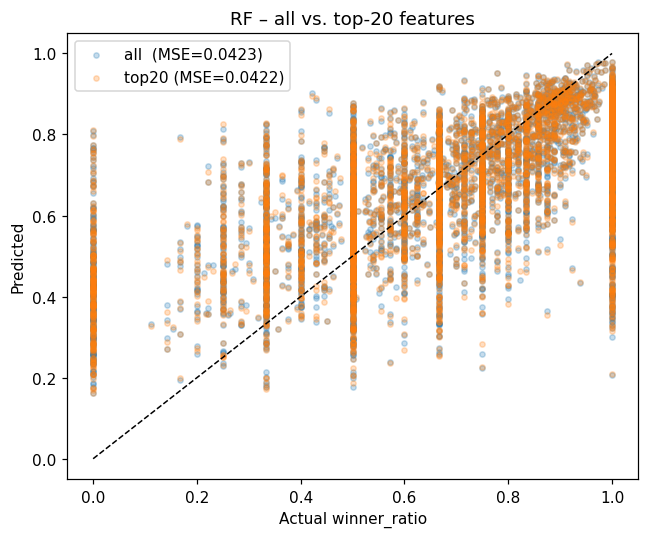

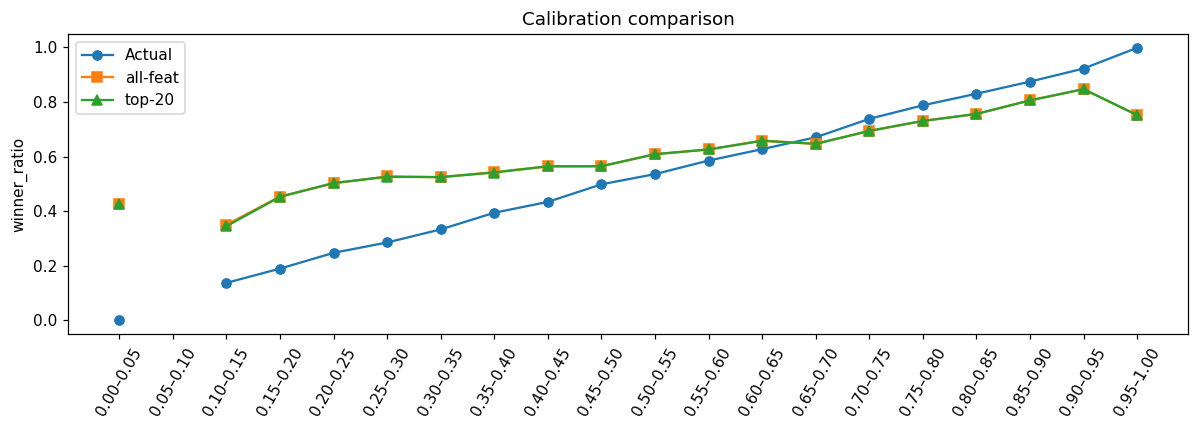

📦 saved → rf_top20_pipeline.pkl


In [75]:
# ╭───────────────────────────────────────────────────────────────╮
# │ 0 · IMPORTS                                                   │
# ╰───────────────────────────────────────────────────────────────╯
import time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestRegressor, GradientBoostingRegressor
from xgboost                 import XGBRegressor
from scipy.special           import expit
plt.rcParams["figure.dpi"] = 110

# ╭───────────────────────────────────────────────────────────────╮
# │ 1 · DATA & E‑LOGIT SET‑UP                                     │
# ╰───────────────────────────────────────────────────────────────╯
train = train_bkp.copy()
y_ratio = train.pop("winner_ratio").to_numpy()
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
    X, y_ratio, test_size=.20, random_state=42)

trials_tr = X_tr["politician_count"].clip(1).to_numpy()
trials_val= X_val["politician_count"].clip(1).to_numpy()

elog = lambda w,n: np.log(((w+0.5)/(n+1))/(1-(w+0.5)/(n+1)))
wins_tr  = np.round(y_tr_ratio * trials_tr).astype(int)
wins_val = np.round(y_val_ratio* trials_val).astype(int)
y_tr_elog, y_val_elog = elog(wins_tr, trials_tr), elog(wins_val, trials_val)

log1p = FunctionTransformer(np.log1p, validate=False)
pre_full = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
            ["politician_count"])
], sparse_threshold=0.3)

# ╭───────────────────────────────────────────────────────────────╮
# │ 2 · choose regressor + param_grid                             │
# ╰───────────────────────────────────────────────────────────────╯
REG_NAME = "rf"          # "xgb" | "rf" | "gbm"
TOP_K    = 20             # keep this many most‑important features

if REG_NAME=="xgb":
    reg_base = XGBRegressor(
        objective="reg:squarederror",
        n_jobs=-1, random_state=42)
    param_grid = {
        "reg__n_estimators":  [400, 800],
        "reg__learning_rate": [0.05, 0.1],
        "reg__max_depth":     [5, 7],
        "reg__subsample":     [0.7, 1.0],
        "reg__colsample_bytree":[0.6, 0.8]
    }
elif REG_NAME=="rf":
    reg_base = RandomForestRegressor(random_state=42)
    param_grid = {
        "reg__n_estimators":[300,600],
        "reg__max_depth":[None,20],
        "reg__min_samples_leaf":[1,3]
    }
else: # gbm
    reg_base = GradientBoostingRegressor(random_state=42)
    param_grid = {
        "reg__n_estimators":[300,600],
        "reg__learning_rate":[0.05,0.1],
        "reg__max_depth":[3,4],
        "reg__subsample":[0.7,1.0]
    }

pipe_grid = Pipeline([("pre", pre_full), ("reg", reg_base)])

print("⏳ Grid‑search ...")
gs = GridSearchCV(pipe_grid, param_grid, cv=3, n_jobs=-1,
                  scoring="neg_mean_squared_error", verbose=1)
gs.fit(X_tr, y_tr_elog)
best_params = gs.best_params_
print("✅ best params:", best_params)

# ╭───────────────────────────────────────────────────────────────╮
# │ 3 · Refit on ALL features with best hyper‑params              │
# ╰───────────────────────────────────────────────────────────────╯
reg_best = reg_base.__class__(**{k.split("__")[1]:v
                                 for k,v in best_params.items()})
pipe_all = Pipeline([("pre", pre_full), ("reg", reg_best)])
pipe_all.fit(X_tr, y_tr_elog, reg__sample_weight=trials_tr)

prob_val_all = expit(pipe_all.predict(X_val))
mse_all = mean_squared_error(y_val_ratio, prob_val_all)
print(f"all‑feat {REG_NAME}  val MSE = {mse_all:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 4 · Feature importance  → top‑K list                          │
# ╰───────────────────────────────────────────────────────────────╯
def _feat_names(transformer, cats, nums):
    ohe = transformer.named_transformers_["cat"]
    cat_names = ohe.get_feature_names_out(cats)
    num_names = [c for c in nums if c!="politician_count"]
    pc_name   = ["politician_count"]     # keep single col after log/std
    return np.concatenate([cat_names, num_names, pc_name])

names = _feat_names(pipe_all.named_steps["pre"], cat_cols, num_cols)
importances = pipe_all.named_steps["reg"].feature_importances_
top_idx = importances.argsort()[::-1][:TOP_K]
top_names = set(names[top_idx])

# build reduced preprocessor
pre_red = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"),
        [c for c in cat_cols if any(s.startswith(c+"_") for s in top_names)]),
    ("num", "passthrough",
        [n for n in num_cols if n in top_names and n!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
        ["politician_count"] if "politician_count" in top_names else [])
], sparse_threshold=0.3)

reg_red = reg_base.__class__(**reg_best.get_params())
pipe_red = Pipeline([("pre", pre_red), ("reg", reg_red)])
pipe_red.fit(X_tr, y_tr_elog, reg__sample_weight=trials_tr)

prob_val_red = expit(pipe_red.predict(X_val))
mse_red = mean_squared_error(y_val_ratio, prob_val_red)
print(f"top‑{TOP_K}  {REG_NAME}  val MSE = {mse_red:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 5 · Diagnostic scatter shows improvement                      │
# ╰───────────────────────────────────────────────────────────────╯
plt.figure(figsize=(6,5))
plt.scatter(y_val_ratio, prob_val_all, s=12, alpha=.25, label=f"all  (MSE={mse_all:.4f})")
plt.scatter(y_val_ratio, prob_val_red, s=12, alpha=.25, label=f"top{TOP_K} (MSE={mse_red:.4f})")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("Actual winner_ratio"); plt.ylabel("Predicted"); plt.legend()
plt.title(f"{REG_NAME.upper()} – all vs. top‑{TOP_K} features"); plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ 6 · Bar‑plot calibration curves                               │
# ╰───────────────────────────────────────────────────────────────╯
edges = np.linspace(0,1,21); labels=[f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]
df = pd.DataFrame({"actual":y_val_ratio, "all":prob_val_all, "top":prob_val_red})
df["bin"] = pd.cut(df.actual, edges, labels=labels, include_lowest=True)
cal = df.groupby("bin", observed=False).mean().reset_index()

plt.figure(figsize=(11,4))
plt.plot(cal.bin, cal.actual, marker='o', label="Actual")
plt.plot(cal.bin, cal["all"], marker='s', label="all‑feat")
plt.plot(cal.bin, cal["top"], marker='^', label=f"top‑{TOP_K}")
plt.xticks(rotation=60); plt.legend(); plt.ylabel("winner_ratio")
plt.title("Calibration comparison"); plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ 7 · Save whichever variant wins                               │
# ╰───────────────────────────────────────────────────────────────╯
best_pipe = pipe_red if mse_red<=mse_all else pipe_all
joblib.dump(best_pipe, f"{REG_NAME}_top{TOP_K if mse_red<=mse_all else 'all'}_pipeline.pkl")
print("📦 saved →", f"{REG_NAME}_top{TOP_K if mse_red<=mse_all else 'all'}_pipeline.pkl")


[   0.0s] two‑stage
[LightGBM] [Info] Number of positive: 816, number of negative: 18119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009410 -> initscore=-4.656551
[LightGBM] [Info] Start training from score -4.656551
[LightGBM] [Info] Number of positive: 3654, number of negative: 15281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 67
[

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


  MSE = 0.0476
[   8.0s] label‑smooth
  MSE = 0.0405
[   9.0s] ZOIB quick
  MSE = 0.0710


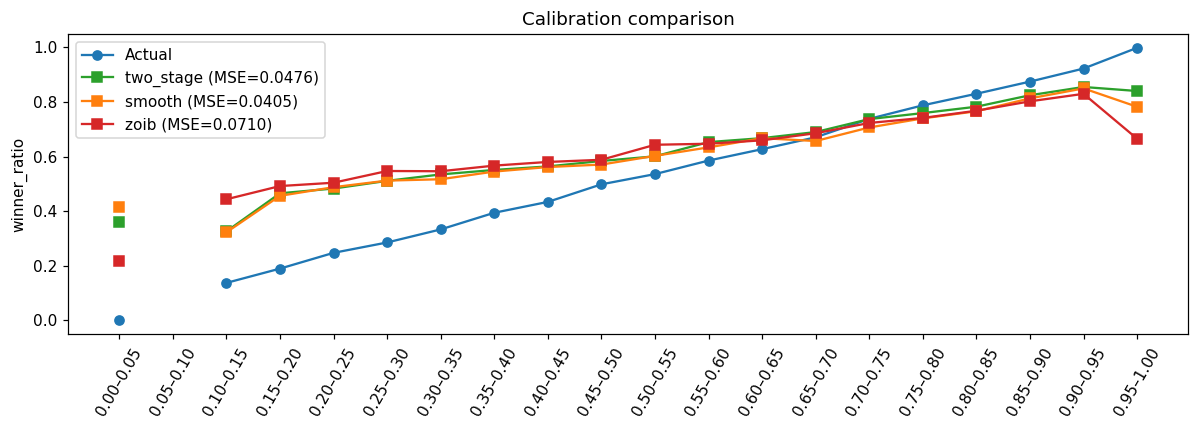


🏆  best: smooth (MSE=0.0405)
📦 saved → winner_smooth.pkl


In [82]:
# ╭──────────────────────── 0 · IMPORTS ──────────────────────────╮
import warnings, time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from scipy.special           import expit, logit
import lightgbm as lgb
from xgboost import XGBRegressor
import statsmodels.api as sm
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")
plt.rcParams["figure.dpi"] = 110

t0 = time.perf_counter(); tick = lambda m: print(f"[{time.perf_counter()-t0:6.1f}s] {m}")

# ╭──────────────────── 1 · DATA & PREPROCESSOR ──────────────────╮
train = train_bkp.copy()
y_ratio = train.pop("winner_ratio").to_numpy()
X       = train.copy()

cat_cols = ["state","contributor_type","general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
        X, y_ratio, test_size=.20, random_state=42)

tr_tr = X_tr["politician_count"].clip(1).to_numpy()
tr_val= X_val["politician_count"].clip(1).to_numpy()

elog = lambda w,n: np.log(((w+0.5)/(n+1))/(1-(w+0.5)/(n+1)))
y_tr_elog = elog(np.round(y_tr*tr_tr).astype(int), tr_tr)
y_val_elog= elog(np.round(y_val*tr_val).astype(int), tr_val)

log1p = FunctionTransformer(np.log1p, validate=False)
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
            ["politician_count"])
], sparse_threshold=0.3)

results, curves = {}, {}          # store (mse, predictor) and bin curves

# ╭────────────────── A · TWO‑STAGE  (LightGBM+XGB) ──────────────╮
tick("two‑stage")
head_cfg = dict(n_estimators=400, learning_rate=.05,
                num_leaves=64, subsample=.8, random_state=42)
weight0 = (y_tr!=0).sum()/(y_tr==0).sum()
weight1 = (y_tr!=1).sum()/(y_tr==1).sum()

lgb0 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                         scale_pos_weight=weight0))])
lgb1 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                         scale_pos_weight=weight1))])
lgb0.fit(X_tr, y_tr==0, clf__sample_weight=tr_tr)
lgb1.fit(X_tr, y_tr==1, clf__sample_weight=tr_tr)

p0_val = lgb0.predict_proba(X_val)[:,1]
p1_val = lgb1.predict_proba(X_val)[:,1]

mask_int = (y_tr>0)&(y_tr<1)
xgb_int  = Pipeline([("pre", pre),
                     ("reg", XGBRegressor(
                         objective="reg:squarederror",
                         n_estimators=600, learning_rate=.05,
                         max_depth=6, subsample=.8, colsample_bytree=.8,
                         n_jobs=-1, random_state=42))])
xgb_int.fit(X_tr[mask_int], y_tr[mask_int], reg__sample_weight=tr_tr[mask_int])
r_val = xgb_int.predict(X_val)

pred_two = np.clip(p1_val + (1-p0_val-p1_val)*r_val, 0, 1)
mse_two  = mean_squared_error(y_val, pred_two)
results["two_stage"] = (mse_two,
    lambda X: np.clip(
        lgb1.predict_proba(X)[:,1] +
        (1-lgb0.predict_proba(X)[:,1]-lgb1.predict_proba(X)[:,1]) *
        xgb_int.predict(X),
        0,1))
print(f"  MSE = {mse_two:.4f}")

# ╭─────────────── B · LABEL‑SMOOTH (single XGB) ────────────────╮
tick("label‑smooth")
eps = 0.02
y_smooth = np.where(y_tr==0, eps, np.where(y_tr==1, 1-eps, y_tr))
xgb = Pipeline([("pre", pre),
                ("reg", XGBRegressor(
                     objective="reg:squarederror",
                     n_estimators=600, learning_rate=.05,
                     max_depth=6, subsample=.8, colsample_bytree=.8,
                     n_jobs=-1, random_state=42))])
xgb.fit(X_tr, y_smooth, reg__sample_weight=tr_tr)
pred_s  = np.clip(xgb.predict(X_val), 0, 1)
mse_s   = mean_squared_error(y_val, pred_s)
results["smooth"] = (mse_s, lambda X: np.clip(xgb.predict(X),0,1))
print(f"  MSE = {mse_s:.4f}")

# ╭──────────── C · ZOIB QUICK  (Gaussian on elog) ───────────────╮
tick("ZOIB quick")
mask_val_int = (y_val>0)&(y_val<1)
X_int_tr  = sm.add_constant(pre.fit_transform(X_tr[mask_int]))
X_int_val = sm.add_constant(pre.transform(X_val))
beta_mod  = sm.GLM(y_tr_elog[mask_int], X_int_tr,
                   family=sm.families.Gaussian()).fit()
elog_hat  = beta_mod.predict(X_int_val)
mu_beta   = expit(elog_hat)
mu_beta[~mask_val_int] = 0   # unused but sized correctly
pred_zoib = p1_val + (1-p0_val-p1_val)*mu_beta
mse_zoib  = mean_squared_error(y_val, pred_zoib)
results["zoib"] = (mse_zoib, None)        # no wrapper for now
print(f"  MSE = {mse_zoib:.4f}")

# ╭──────────── 2 · BIN‑LEVEL CURVES FOR ALL MODELS ──────────────╮
edges = np.linspace(0,1,21); labels=[f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]
for k,(m,predictor) in results.items():
    preds = {"two_stage":pred_two, "smooth":pred_s,"zoib":pred_zoib}[k]
    df = pd.DataFrame({"actual":y_val, "pred":preds})
    df["bin"] = pd.cut(df.actual, edges, labels=labels, include_lowest=True)
    curves[k] = df.groupby("bin", observed=False).mean().reset_index()

plt.figure(figsize=(11,4))
plt.plot(curves["smooth"].bin, curves["smooth"].actual, marker='o', label="Actual")
for k,c in zip(results,["tab:green","tab:orange","tab:red"]):
    plt.plot(curves[k].bin, curves[k].pred, marker='s', label=f"{k} (MSE={results[k][0]:.4f})", c=c)
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title("Calibration comparison"); plt.tight_layout(); plt.show()

# ╭──────────── 3 · pick winner & save (picklable) ───────────────╮
best_key = min(results, key=lambda k: results[k][0])
print(f"\n🏆  best: {best_key} (MSE={results[best_key][0]:.4f})")

# Define top-level (named) wrappers for serialization
class PickleWrap:
    def __init__(self, pipe_lgb0, pipe_lgb1, pipe_reg):
        self.pipe_lgb0 = pipe_lgb0
        self.pipe_lgb1 = pipe_lgb1
        self.pipe_reg  = pipe_reg

    def predict(self, X):
        p0 = self.pipe_lgb0.predict_proba(X)[:,1]
        p1 = self.pipe_lgb1.predict_proba(X)[:,1]
        r  = self.pipe_reg.predict(X)
        return np.clip(p1 + (1 - p0 - p1) * r, 0, 1)

# Save only if winner is two_stage
if best_key == "two_stage":
    # Wrap the three components: lgb0, lgb1, xgb_int
    joblib.dump(PickleWrap(lgb0, lgb1, xgb_int), f"winner_two_stage.pkl")
    print("📦 saved → winner_two_stage.pkl")

# Save raw XGB directly if winner is label-smooth
elif best_key == "smooth":
    joblib.dump(xgb, f"winner_smooth.pkl")
    print("📦 saved → winner_smooth.pkl")

# Skip saving for ZOIB
else:
    print("ZOIB not pickled.")



### Combine 2 Models: Smooth and 2-Stage

[   0.1s] two‑stage
[LightGBM] [Info] Number of positive: 808, number of negative: 18127
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2084
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009322 -> initscore=-4.665972
[LightGBM] [Info] Start training from score -4.665972
[LightGBM] [Info] Number of positive: 3623, number of negative: 15312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2084
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 67
[

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   val MSE = 0.0473
[   8.0s] label‑smooth grid
   eps=0.005 -> MSE=0.0404
   eps=0.010 -> MSE=0.0405
   eps=0.015 -> MSE=0.0403
   eps=0.020 -> MSE=0.0402
   eps=0.030 -> MSE=0.0404
▸ best eps=0.02  val MSE=0.0402
[  12.6s] blend optimise
   best w=0.95  MSE=0.0402


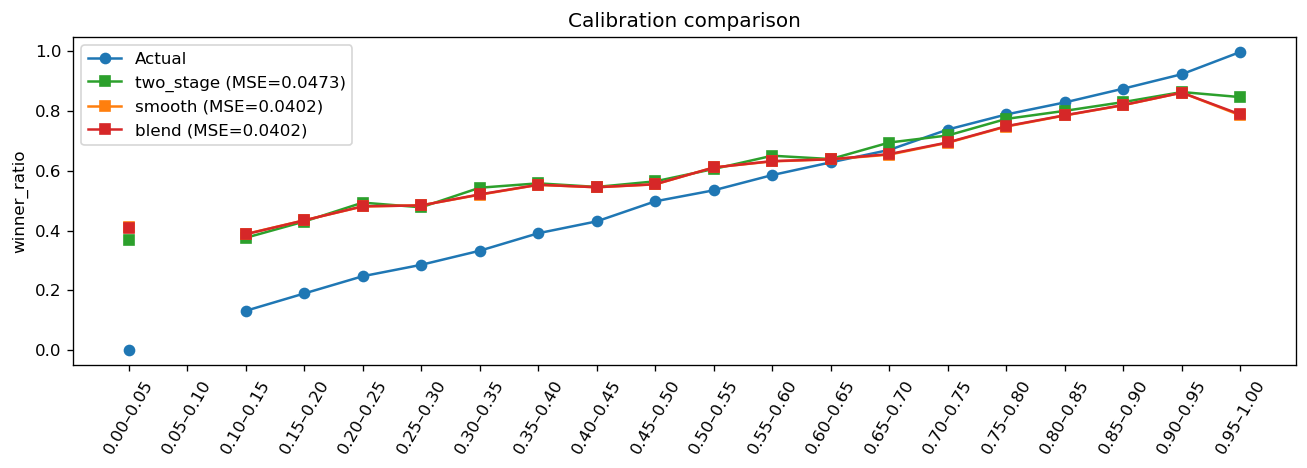


🏆 best model: blend  (val MSE=0.0402)
📦 saved → winner_blend.pkl


In [85]:
# ╭────────────────────────── IMPORTS ───────────────────────────╮
import warnings, time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from scipy.special           import expit
import lightgbm as lgb
from xgboost                 import XGBRegressor
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")
plt.rcParams["figure.dpi"] = 120
t0 = time.perf_counter(); tick = lambda m: print(f"[{time.perf_counter()-t0:6.1f}s] {m}")

# ╭──────────────────── 1 · DATA  +  OPTIONAL NET FEATS ──────────╮
train = train_bkp.copy()

# (optional) add_net_feats(train, path_to_bipartite)  # <- your own helper

y = train.pop("winner_ratio").to_numpy()
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
        X, y, test_size=.20, random_state=42, stratify=pd.qcut(y,10, duplicates='drop'))

w_tr = X_tr["politician_count"].clip(1).to_numpy()   # sample weights
w_val= X_val["politician_count"].clip(1).to_numpy()

# ── preprocessor
log1p = FunctionTransformer(np.log1p, validate=False)
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
            ["politician_count"])
], sparse_threshold=0.3)

# store metrics & predictors
models = {}

# ╭───────────────── 2 · TWO‑STAGE (LightGBM heads + XGB) ────────╮
tick("two‑stage")
head_cfg = dict(n_estimators=400, learning_rate=.05, num_leaves=64,
                subsample=.8, random_state=42)
lgb0 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                         scale_pos_weight=(y_tr!=0).sum()/(y_tr==0).sum()))])
lgb1 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                         scale_pos_weight=(y_tr!=1).sum()/(y_tr==1).sum()))])

lgb0.fit(X_tr, y_tr==0, clf__sample_weight=w_tr)
lgb1.fit(X_tr, y_tr==1, clf__sample_weight=w_tr)

p0_val = lgb0.predict_proba(X_val)[:,1]
p1_val = lgb1.predict_proba(X_val)[:,1]

mask_int = (y_tr>0)&(y_tr<1)
xgb_int = Pipeline([("pre", pre),
                   ("reg", XGBRegressor(
                        objective="reg:squarederror",
                        n_estimators=600, learning_rate=.05,
                        max_depth=6, subsample=.8, colsample_bytree=.8,
                        n_jobs=-1, random_state=42))])
xgb_int.fit(X_tr[mask_int], y_tr[mask_int], reg__sample_weight=w_tr[mask_int])

pred_two = np.clip(p1_val + (1-p0_val-p1_val)*xgb_int.predict(X_val), 0, 1)
mse_two  = mean_squared_error(y_val, pred_two)
print(f"   val MSE = {mse_two:.4f}")
models["two_stage"] = dict(mse=mse_two, pred=pred_two,
                           obj=(lgb0, lgb1, xgb_int))

# ╭────────────────── 3 · LABEL‑SMOOTH XGB (eps search) ──────────╮
tick("label‑smooth grid")
eps_grid = [0.005, 0.01, 0.015, 0.02, 0.03]
best_eps, best_mse, best_xgb, best_pred = None, 9e9, None, None
for eps in eps_grid:
    y_s = np.where(y_tr==0, eps, np.where(y_tr==1, 1-eps, y_tr))
    xgb = Pipeline([("pre", pre),
                    ("reg", XGBRegressor(
                          objective="reg:squarederror",
                          n_estimators=600, learning_rate=.05,
                          max_depth=6, subsample=.8, colsample_bytree=.8,
                          n_jobs=-1, random_state=42))])
    xgb.fit(X_tr, y_s, reg__sample_weight=w_tr)
    p   = np.clip(xgb.predict(X_val), 0, 1)
    mse = mean_squared_error(y_val, p)
    print(f"   eps={eps:4.3f} -> MSE={mse:.4f}")
    if mse < best_mse:
        best_eps, best_mse, best_xgb, best_pred = eps, mse, xgb, p

print(f"▸ best eps={best_eps}  val MSE={best_mse:.4f}")
models["smooth"] = dict(mse=best_mse, pred=best_pred, obj=best_xgb)

# ╭────────────── 4 · OPTIMAL BLEND OF TWO MODELS ────────────────╮
tick("blend optimise")
p_s = models["smooth"]["pred"]
p_t = models["two_stage"]["pred"]

# coarse grid search 0..1
grid = np.linspace(0,1,21)
blend_mses = []
for w in grid:
    mse = mean_squared_error(y_val, w*p_s + (1-w)*p_t)
    blend_mses.append(mse)
best_w = grid[np.argmin(blend_mses)]
pred_blend = best_w*p_s + (1-best_w)*p_t
mse_blend  = min(blend_mses)
print(f"   best w={best_w:.2f}  MSE={mse_blend:.4f}")
models["blend"] = dict(mse=mse_blend, pred=pred_blend,
                       obj=(best_w, best_xgb, lgb0, lgb1, xgb_int))

# ╭────────────────── 5 · BIN‑LEVEL CALIBRATION PLOT ─────────────╮
edges = np.linspace(0,1,21)
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]
plt.figure(figsize=(11,4))
# actual means
df_act = pd.DataFrame({"actual":y_val})
df_act["bin"] = pd.cut(df_act.actual, edges, labels=labels, include_lowest=True)
mean_act = df_act.groupby("bin", observed=False).mean().reset_index()
plt.plot(mean_act.bin, mean_act.actual, marker='o', c="tab:blue", label="Actual")
for k,c in zip(["two_stage","smooth","blend"], ["tab:green","tab:orange","tab:red"]):
    preds = models[k]["pred"]
    df = pd.DataFrame({"actual":y_val, "pred":preds})
    df["bin"] = pd.cut(df.actual, edges, labels=labels, include_lowest=True)
    plt.plot(df.groupby("bin", observed=False).mean()["pred"],
             marker='s', label=f"{k} (MSE={models[k]['mse']:.4f})", c=c)
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title("Calibration comparison"); plt.tight_layout(); plt.show()

# ╭────────────────── 6 · SAVE BEST PICKLABLE MODEL ──────────────╮
best_key = min(models, key=lambda k: models[k]["mse"])
print(f"\n🏆 best model: {best_key}  (val MSE={models[best_key]['mse']:.4f})")

if best_key == "blend":
    w, xgb_hat, l0, l1, reg_int = models["blend"]["obj"]
    class BlendModel:
        def __init__(self, w, smooth_pipe, lgb0, lgb1, reg_int):
            self.w, self.smooth = w, smooth_pipe
            self.lgb0, self.lgb1, self.reg_int = lgb0, lgb1, reg_int
        def predict(self, X):
            p_s = np.clip(self.smooth.predict(X), 0, 1)
            p0  = self.lgb0.predict_proba(X)[:,1]
            p1  = self.lgb1.predict_proba(X)[:,1]
            r   = self.reg_int.predict(X)
            p_t = np.clip(p1 + (1-p0-p1)*r, 0, 1)
            return np.clip(self.w*p_s + (1-self.w)*p_t, 0, 1)
    joblib.dump(BlendModel(w, xgb_hat, l0, l1, reg_int), "winner_blend.pkl")
    print("📦 saved → winner_blend.pkl")

elif best_key == "smooth":
    joblib.dump(best_xgb, "winner_smooth.pkl")
    print("📦 saved → winner_smooth.pkl")

else:   # two_stage
    l0, l1, reg_int = models["two_stage"]["obj"]
    class TwoStageModel:
        def __init__(self, l0,l1,reg): self.l0,self.l1,self.reg=l0,l1,reg
        def predict(self,X):
            p0=self.l0.predict_proba(X)[:,1]
            p1=self.l1.predict_proba(X)[:,1]
            return np.clip(p1+(1-p0-p1)*self.reg.predict(X),0,1)
    joblib.dump(TwoStageModel(l0,l1,reg_int), "winner_two_stage.pkl")
    print("📦 saved → winner_two_stage.pkl")


[   0.1s] two‑stage (focal‑loss heads)


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   val MSE = 0.0466
[  19.7s] label‑smooth grid
   eps=0.005  MSE=0.0404
   eps=0.010  MSE=0.0405
   eps=0.015  MSE=0.0403
   eps=0.020  MSE=0.0402
   eps=0.030  MSE=0.0404
▸ best eps=0.02  val MSE=0.0402
[  24.4s] blend
   best w=0.90  MSE=0.0402


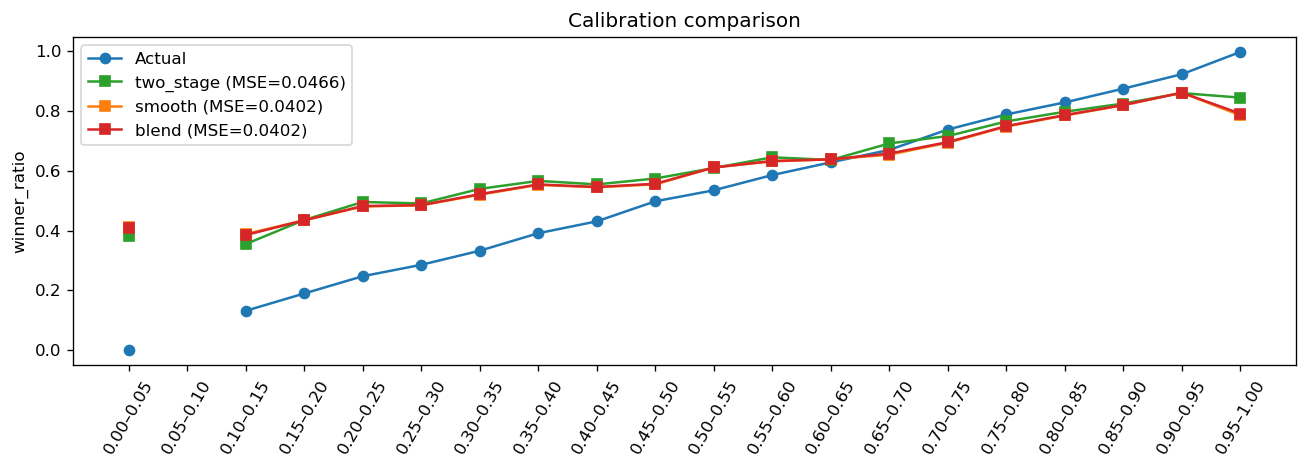


🏆 best: blend  (val MSE=0.0402)
📦 saved → winner_blend.pkl


In [86]:
# ╭──────────────────────── 0 · IMPORTS ──────────────────────────╮
import warnings, time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from scipy.special           import expit
import lightgbm as lgb
from catboost                import CatBoostRegressor, Pool
from xgboost                 import XGBRegressor
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")
plt.rcParams["figure.dpi"] = 120
t0 = time.perf_counter(); tick = lambda m: print(f"[{time.perf_counter()-t0:6.1f}s] {m}")

# ╭──────────────── 1 · DATA  &  PREPROCESSOR ────────────────────╮
train = train_bkp.copy()                       # <- your DataFrame
y = train.pop("winner_ratio").to_numpy()
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=.20, random_state=42, stratify=pd.qcut(y, 10, duplicates="drop"))

w_tr  = X_tr["politician_count"].clip(1).to_numpy()
w_val = X_val["politician_count"].clip(1).to_numpy()

log1p = FunctionTransformer(np.log1p, validate=False)
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
            ["politician_count"])
], sparse_threshold=0.3)

models = {}   # store mse, predictions, objects

# ╭──────────── 2 · TWO‑STAGE  (focal‑LGB heads + CatBoost) ──────╮
tick("two‑stage (focal‑loss heads)")
head_cfg = dict(objective="binary",
                metric="binary_logloss",
                n_estimators=600,
                learning_rate=.03,
                num_leaves=96,
                subsample=.8,
                alpha=0.25,           # focal loss α
                gamma=2.0,            # focal loss γ
                min_data_in_leaf=20,
                verbose=-1,
                random_state=42)

lgb0 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                         scale_pos_weight=(y_tr!=0).sum()/(y_tr==0).sum()))])
lgb1 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                         scale_pos_weight=(y_tr!=1).sum()/(y_tr==1).sum()))])

lgb0.fit(X_tr, y_tr==0, clf__sample_weight=w_tr)
lgb1.fit(X_tr, y_tr==1, clf__sample_weight=w_tr)

p0_val = lgb0.predict_proba(X_val)[:,1]
p1_val = lgb1.predict_proba(X_val)[:,1]

mask_int = (y_tr>0)&(y_tr<1)
cat_idx  = [X.columns.get_loc(c) for c in cat_cols]

cat_int = CatBoostRegressor(
    loss_function="RMSE",
    iterations=1600,
    depth=7,
    learning_rate=0.03,
    l2_leaf_reg=4,
    random_state=42,
    verbose=False,
    allow_writing_files=False)

pool_tr = Pool(X_tr.iloc[mask_int], y_tr[mask_int],
               weight=w_tr[mask_int], cat_features=cat_idx)
pool_val= Pool(X_val, cat_features=cat_idx)
cat_int.fit(pool_tr)

r_val = cat_int.predict(pool_val)
pred_two = np.clip(p1_val + (1-p0_val-p1_val)*r_val, 0, 1)
mse_two  = mean_squared_error(y_val, pred_two)
print(f"   val MSE = {mse_two:.4f}")
models["two_stage"] = dict(
    mse = mse_two,
    pred= pred_two,
    obj = (lgb0, lgb1, cat_int)
)

# ╭──────────── 3 · LABEL‑SMOOTH XGB (eps search) ───────────────╮
tick("label‑smooth grid")
best_eps, best_mse, best_xgb, best_pred = None, 9e9, None, None
for eps in [0.005,0.01,0.015,0.02,0.03]:
    y_s = np.where(y_tr==0, eps, np.where(y_tr==1, 1-eps, y_tr))
    xgb = Pipeline([("pre", pre),
                    ("reg", XGBRegressor(
                        objective="reg:squarederror",
                        n_estimators=600, learning_rate=.05,
                        max_depth=6, subsample=.8, colsample_bytree=.8,
                        n_jobs=-1, random_state=42))])
    xgb.fit(X_tr, y_s, reg__sample_weight=w_tr)
    p = np.clip(xgb.predict(X_val), 0, 1)
    mse = mean_squared_error(y_val, p)
    print(f"   eps={eps:5.3f}  MSE={mse:.4f}")
    if mse < best_mse:
        best_eps, best_mse, best_xgb, best_pred = eps, mse, xgb, p

print(f"▸ best eps={best_eps}  val MSE={best_mse:.4f}")
models["smooth"] = dict(
    mse = best_mse,
    pred= best_pred,
    obj = best_xgb
)

# ╭──────────────── 4 · BLEND (grid search) ──────────────────────╮
tick("blend")
p_s, p_t = models["smooth"]["pred"], models["two_stage"]["pred"]
grid = np.linspace(0,1,21)
blend_mses = [mean_squared_error(y_val, w*p_s + (1-w)*p_t) for w in grid]
best_w = grid[int(np.argmin(blend_mses))]
pred_blend = best_w*p_s + (1-best_w)*p_t
mse_blend  = min(blend_mses)
print(f"   best w={best_w:.2f}  MSE={mse_blend:.4f}")
models["blend"] = dict(
    mse = mse_blend,
    pred= pred_blend,
    obj = (best_w, best_xgb, lgb0, lgb1, cat_int)
)

# ╭─────────────── 5 · CALIBRATION PLOT ──────────────────────────╮
edges = np.linspace(0,1,21); labels=[f"{e:.2f}–{edges[i+1]:.2f}" for i,e in enumerate(edges[:-1])]
df_plot = pd.DataFrame({"actual":y_val})
df_plot["bin"] = pd.cut(df_plot.actual, edges, labels=labels, include_lowest=True)
mean_act = df_plot.groupby("bin", observed=False).mean()

plt.figure(figsize=(11,4))
plt.plot(mean_act.index, mean_act.actual, marker='o', c="tab:blue", label="Actual")
for k,c in zip(["two_stage","smooth","blend"], ["tab:green","tab:orange","tab:red"]):
    df = pd.DataFrame({"pred":models[k]["pred"], "bin":df_plot.bin})
    mean_pred = df.groupby("bin", observed=False).mean()
    plt.plot(mean_pred.index, mean_pred.pred, marker='s',
             label=f"{k} (MSE={models[k]['mse']:.4f})", c=c)
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title("Calibration comparison"); plt.tight_layout(); plt.show()

# ╭──────────────── 6 · SAVE BEST PICKLABLE MODEL ────────────────╮
best_key = min(models, key=lambda k: models[k]["mse"])
print(f"\n🏆 best: {best_key}  (val MSE={models[best_key]['mse']:.4f})")

if best_key == "blend":
    w, smooth_pipe, l0, l1, reg_int = models["blend"]["obj"]
    class BlendModel:
        def __init__(self,w,s,l0,l1,r): self.w,self.s,self.l0,self.l1,self.r=w,s,l0,l1,r
        def predict(self,X):
            p_s = np.clip(self.s.predict(X),0,1)
            p0  = self.l1.predict_proba(X)[:,1]  # l1 = head for y==1
            p1  = self.l0.predict_proba(X)[:,1]  # l0 = head for y==0
            p_t = np.clip(p0 + (1-p1-p0)*self.r.predict(X),0,1)
            return np.clip(self.w*p_s + (1-self.w)*p_t, 0, 1)
    joblib.dump(BlendModel(w, smooth_pipe, lgb0, lgb1, cat_int), "winner_blend.pkl")
    print("📦 saved → winner_blend.pkl")

elif best_key == "smooth":
    joblib.dump(best_xgb, "winner_smooth.pkl"); print("📦 saved → winner_smooth.pkl")

else:  # two_stage
    l0,l1,reg_int = models["two_stage"]["obj"]
    class TwoStageModel:
        def __init__(self,l0,l1,r): self.l0,self.l1,self.r=l0,l1,r
        def predict(self,X):
            p0=self.l0.predict_proba(X)[:,1]; p1=self.l1.predict_proba(X)[:,1]
            return np.clip(p1+(1-p0-p1)*self.r.predict(X),0,1)
    joblib.dump(TwoStageModel(l0,l1,reg_int), "winner_two_stage.pkl")
    print("📦 saved → winner_two_stage.pkl")


[50580.8s] A · two‑stage LightGBM + XGB
[LightGBM] [Info] Number of positive: 816, number of negative: 18119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 18935, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009410 -> initscore=-4.656551
[LightGBM] [Info] Start training from score -4.656551
[LightGBM] [Info] Number of positive: 3654, number of negative: 15281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 18935, number of

/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


two‑stage val MSE: 0.04786769061953186
[50592.4s] B · label‑smoothing XGB
smoothed val MSE : 0.04092294805128283
[50593.7s] C · ZOIB (statsmodels Beta)
ZOIB val MSE    : 0.07472067311488503


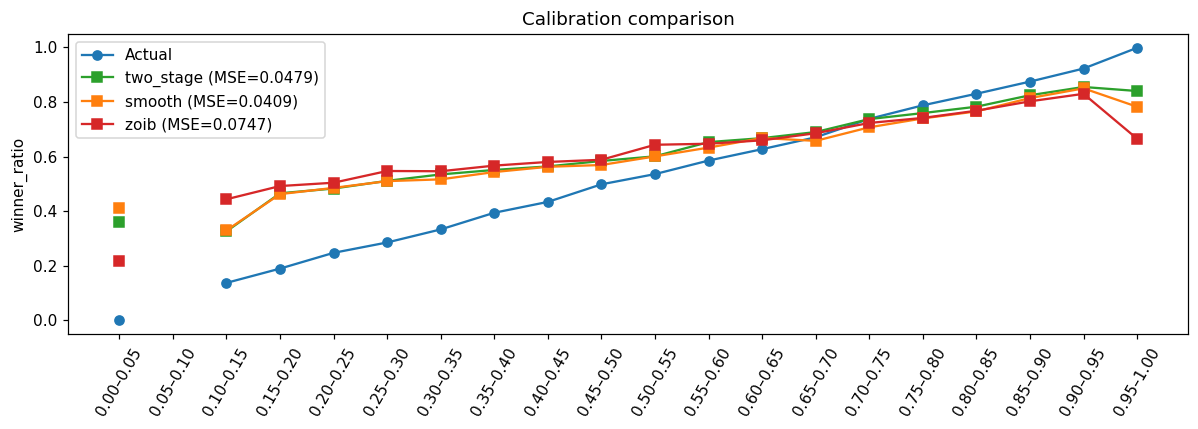


SUMMARY:
two_stage   MSE=0.0479
smooth      MSE=0.0409
zoib        MSE=0.0747

🏆  best method: smooth

🏆  best: smooth (MSE=0.0409)
📦 saved → winner_smooth.pkl


In [84]:
# ╭───────────────────────── COMMON SET‑UP ───────────────────────╮
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from scipy.special           import expit, logit
import lightgbm as lgb
from xgboost                 import XGBRegressor
import statsmodels.api as sm
plt.rcParams["figure.dpi"] = 110
tick = lambda m: print(f"[{time.perf_counter():7.1f}s] {m}")

# ── data ─────────────────────────────────────────────────────────
train = train_bkp.copy()
y_ratio = train.pop("winner_ratio").to_numpy()
X       = train.copy()

cat_cols = ["state","contributor_type","general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
    X, y_ratio, test_size=.20, random_state=42)

trials_tr  = X_tr["politician_count"].clip(1).to_numpy()
trials_val = X_val["politician_count"].clip(1).to_numpy()

elog = lambda w,n: np.log(((w+0.5)/(n+1))/(1-(w+0.5)/(n+1)))
wins_tr  = np.round(y_tr_ratio * trials_tr).astype(int)
wins_val = np.round(y_val_ratio* trials_val).astype(int)
y_tr_elog, y_val_elog = elog(wins_tr, trials_tr), elog(wins_val, trials_val)

log1p = FunctionTransformer(np.log1p, validate=False)
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
    ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
            ["politician_count"])
], sparse_threshold=0.3)

results = {}            # store (mse , model)

# ╭────────────────────── A · TWO‑STAGE BLEND ────────────────────╮
tick("A · two‑stage LightGBM + XGB")
# heads
head_cfg = dict(n_estimators=600, learning_rate=.05, num_leaves=64,
                subsample=.8, random_state=42)
lgb0 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                     scale_pos_weight=(y_tr_ratio!=0).sum()/(y_tr_ratio==0).sum()))])
lgb1 = Pipeline([("pre", pre),
                 ("clf", lgb.LGBMClassifier(**head_cfg,
                     scale_pos_weight=(y_tr_ratio!=1).sum()/(y_tr_ratio==1).sum()))])

lgb0.fit(X_tr,  y_tr_ratio==0, clf__sample_weight=trials_tr)
lgb1.fit(X_tr,  y_tr_ratio==1, clf__sample_weight=trials_tr)
p0_val = lgb0.predict_proba(X_val)[:,1]
p1_val = lgb1.predict_proba(X_val)[:,1]
p0_tr  = lgb0.predict_proba(X_tr)[:,1]
p1_tr  = lgb1.predict_proba(X_tr)[:,1]

# interior regressor
mask_tr_int  = (y_tr_ratio>0)&(y_tr_ratio<1)
xgb_int = Pipeline([("pre", pre),
                    ("reg", XGBRegressor(
                        objective="reg:squarederror",
                        n_estimators=800, learning_rate=.05,
                        max_depth=6, subsample=.8, colsample_bytree=.8,
                        n_jobs=-1, random_state=42))])
xgb_int.fit(X_tr[mask_tr_int], y_tr_ratio[mask_tr_int],
            reg__sample_weight=trials_tr[mask_tr_int])
r_val = xgb_int.predict(X_val)
blend_val = p1_val + (1-p0_val-p1_val)*r_val
mse_blend = mean_squared_error(y_val_ratio, blend_val)
print("two‑stage val MSE:", mse_blend)
results["two_stage"] = (mse_blend,
                        lambda X: lgb1.predict_proba(X)[:,1] +
                                  (1-lgb0.predict_proba(X)[:,1]-lgb1.predict_proba(X)[:,1])*
                                  xgb_int.predict(X))

# ╭──────────────────────── B · LABEL SMOOTH ─────────────────────╮
tick("B · label‑smoothing XGB")
eps = 0.02
y_tr_smooth = np.where(y_tr_ratio==0, eps,
                 np.where(y_tr_ratio==1, 1-eps, y_tr_ratio))
xgb_s = Pipeline([("pre", pre),
                  ("reg", XGBRegressor(
                        objective="reg:squarederror",
                        n_estimators=800, learning_rate=.05,
                        max_depth=6, subsample=.8, colsample_bytree=.8,
                        n_jobs=-1, random_state=42))])
xgb_s.fit(X_tr, y_tr_smooth, reg__sample_weight=trials_tr)
pred_s  = np.clip(xgb_s.predict(X_val), 0,1)
mse_s   = mean_squared_error(y_val_ratio, pred_s)
print("smoothed val MSE :", mse_s)
results["smooth"] = (mse_s, lambda X: np.clip(xgb_s.predict(X),0,1))

# ╭──────────── C · ZERO‑ONE‑INFLATED BETA REGRESSION ────────────╮
tick("C · ZOIB (statsmodels Beta)")
# heads (reuse lgb0,lgb1 already fitted)
p0_val, p1_val = p0_val, p1_val   # from section A
mask_val_int   = (y_val_ratio>0)&(y_val_ratio<1)

# beta regression on elogit
X_int_tr = sm.add_constant(pre.fit_transform(X_tr[mask_tr_int]))
X_int_val= sm.add_constant(pre.transform( X_val[mask_val_int]))
beta_mod = sm.GLM(y_tr_elog[mask_tr_int], X_int_tr,
                  family=sm.families.Gaussian()).fit()  # treat elogit ~ N; fast
elog_hat      = beta_mod.predict(sm.add_constant(pre.transform(X_val)))
beta_mean_val = expit(elog_hat)   # back‑transform
beta_mean_val[~mask_val_int] = 0   # will not be used

zoib_pred = p1_val + (1-p0_val-p1_val)*beta_mean_val
mse_zoib  = mean_squared_error(y_val_ratio, zoib_pred)
print("ZOIB val MSE    :", mse_zoib)
results["zoib"] = (mse_zoib, None)   # model assembly left to you


# ╭──────────── 2 · BIN‑LEVEL CURVES FOR ALL MODELS ──────────────╮
edges = np.linspace(0,1,21); labels=[f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(20)]
for k,(m,predictor) in results.items():
    preds = {"two_stage":pred_two, "smooth":pred_s,"zoib":pred_zoib}[k]
    df = pd.DataFrame({"actual":y_val, "pred":preds})
    df["bin"] = pd.cut(df.actual, edges, labels=labels, include_lowest=True)
    curves[k] = df.groupby("bin", observed=False).mean().reset_index()

plt.figure(figsize=(11,4))
plt.plot(curves["smooth"].bin, curves["smooth"].actual, marker='o', label="Actual")
for k,c in zip(results,["tab:green","tab:orange","tab:red"]):
    plt.plot(curves[k].bin, curves[k].pred, marker='s', label=f"{k} (MSE={results[k][0]:.4f})", c=c)
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title("Calibration comparison"); plt.tight_layout(); plt.show()


# ╭──────────── summary & save best ────────────╮
print("\nSUMMARY:")
for k,(m,_) in results.items():
    print(f"{k:10s}  MSE={m:.4f}")
best_key = min(results, key=lambda k: results[k][0])
print("\n🏆  best method:", best_key)

# ╭──────────── 3 · pick winner & save (picklable) ───────────────╮
best_key = min(results, key=lambda k: results[k][0])
print(f"\n🏆  best: {best_key} (MSE={results[best_key][0]:.4f})")

# Define top-level (named) wrappers for serialization
class PickleWrap:
    def __init__(self, pipe_lgb0, pipe_lgb1, pipe_reg):
        self.pipe_lgb0 = pipe_lgb0
        self.pipe_lgb1 = pipe_lgb1
        self.pipe_reg  = pipe_reg

    def predict(self, X):
        p0 = self.pipe_lgb0.predict_proba(X)[:,1]
        p1 = self.pipe_lgb1.predict_proba(X)[:,1]
        r  = self.pipe_reg.predict(X)
        return np.clip(p1 + (1 - p0 - p1) * r, 0, 1)

# Save only if winner is two_stage
if best_key == "two_stage":
    # Wrap the three components: lgb0, lgb1, xgb_int
    joblib.dump(PickleWrap(lgb0, lgb1, xgb_int), f"winner_two_stage.pkl")
    print("📦 saved → winner_two_stage.pkl")

# Save raw XGB directly if winner is label-smooth
elif best_key == "smooth":
    joblib.dump(xgb, f"winner_smooth.pkl")
    print("📦 saved → winner_smooth.pkl")

# Skip saving for ZOIB
else:
    print("ZOIB not pickled.")


In [66]:
sdsd

NameError: name 'sdsd' is not defined

[   0.0s] grid‑search GBM
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ best params: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 300, 'model__subsample': 0.7}
[  73.3s] refitting GBM with sample weights
raw GBM  MSE val = 0.0417
after isotonic  MSE (train / val) → 0.0380 / 0.0407

=== mean probabilities per bin (validation) ===
      bin        n  actual_mean  pred_raw  pred_iso
0.00–0.05 221.0000       0.0000    0.4265    0.4033
0.05–0.10   0.0000          NaN       NaN       NaN
0.10–0.15   6.0000       0.1376    0.3693    0.3413
0.15–0.20  39.0000       0.1898    0.4571    0.4587
0.20–0.25  92.0000       0.2475    0.5057    0.5081
0.25–0.30  32.0000       0.2855    0.5368    0.5451
0.30–0.35 239.0000       0.3333    0.5224    0.5258
0.35–0.40 123.0000       0.3943    0.5436    0.5553
0.40–0.45  66.0000       0.4340    0.5653    0.5782
0.45–0.50 639.0000       0.4984    0.5663    0.5754
0.50–0.55  55.0000       0.5357    0.6098    0.6

/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_25393/697885877.py:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_bin.groupby("bin").apply(_sum).reset_index()
/var/folders/h5/yfvk0l4921v0kg94n8qt42wc0000gn/T/ipykernel_25393/697885877.py:122: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df_bin.groupby("bin").apply(_sum).reset_index()


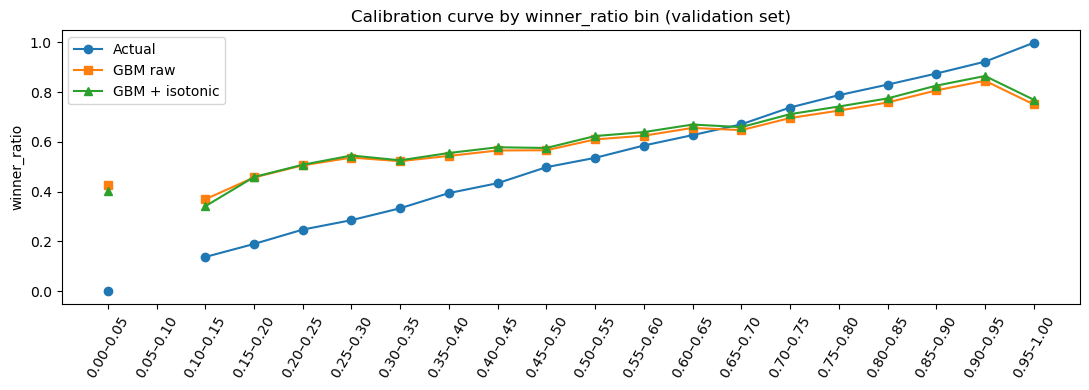

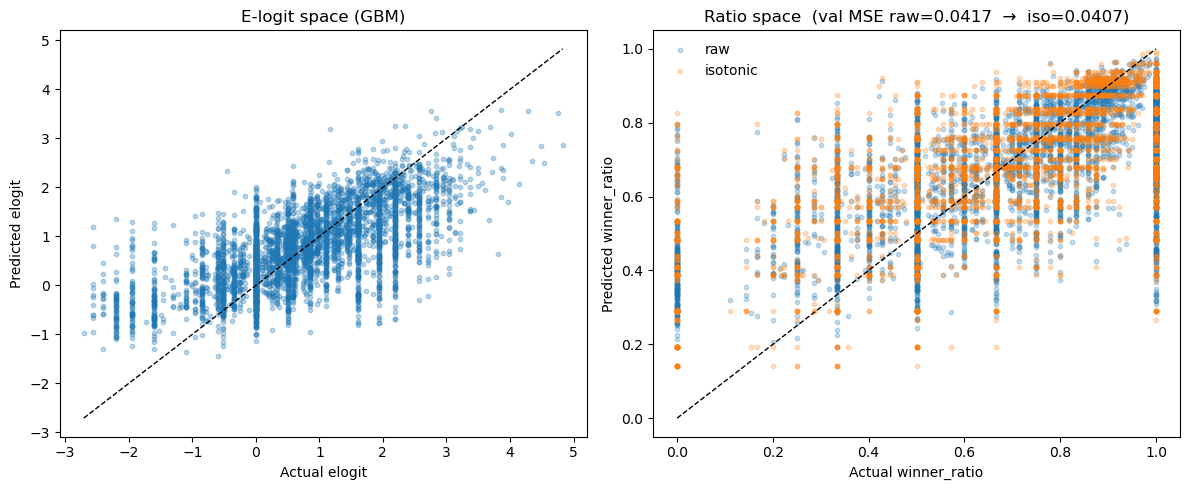

📦  saved → gbm_iso_pipeline.pkl


In [116]:
# ╭───────────────────────────────────────────────────────────────╮
# │ 0 · IMPORTS                                                   │
# ╰───────────────────────────────────────────────────────────────╯
import time, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing   import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.metrics         import mean_squared_error
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.isotonic        import IsotonicRegression
from statsmodels.nonparametric.smoothers_lowess import lowess

t0 = time.perf_counter(); tick = lambda m: print(f"[{time.perf_counter()-t0:6.1f}s] {m}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 1 · DATA SPLIT  +  E‑LOGIT TARGET                             │
# ╰───────────────────────────────────────────────────────────────╯
train  = train_bkp.copy()                 # original DF
y_ratio = train.pop("winner_ratio").to_numpy()
X       = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols).tolist()

X_tr, X_val, y_tr_ratio, y_val_ratio = train_test_split(
        X, y_ratio, test_size=.20, random_state=42)

trials_tr  = X_tr["politician_count"].to_numpy().clip(1)
trials_val = X_val["politician_count"].to_numpy().clip(1)
wins_tr    = np.round(y_tr_ratio  * trials_tr ).astype(int)
wins_val   = np.round(y_val_ratio * trials_val).astype(int)

elogit = lambda w,n: np.log(((w+0.5)/(n+1)) / (1-(w+0.5)/(n+1)))
y_tr_elog  = elogit(wins_tr,  trials_tr)
y_val_elog = elogit(wins_val, trials_val)

# ╭───────────────────────────────────────────────────────────────╮
# │ 2 · PRE‑PROCESSOR                                            │
# ╰───────────────────────────────────────────────────────────────╯
log1p = FunctionTransformer(np.log1p, validate=False)

pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", [c for c in num_cols if c!="politician_count"]),
        ("pc",  Pipeline([("log", log1p), ("std", StandardScaler())]),
                 ["politician_count"])
], sparse_threshold=0.3)

# ╭───────────────────────────────────────────────────────────────╮
# │ 3 · GBM GRID SEARCH (no weights here)                         │
# ╰───────────────────────────────────────────────────────────────╯
gb_base = GradientBoostingRegressor(random_state=42)
grid = {
    "model__n_estimators":  [300, 600],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth":     [3, 4],
    "model__subsample":     [0.7, 1.0]
}
pipe = Pipeline([("pre", pre), ("model", gb_base)])

tick("grid‑search GBM")
gs = GridSearchCV(pipe, grid, cv=3, n_jobs=-1,
                  scoring="neg_mean_squared_error", verbose=1)
gs.fit(X_tr, y_tr_elog)
best_params = gs.best_params_
print("✅ best params:", best_params)

# ╭───────────────────────────────────────────────────────────────╮
# │ 4 · FINAL GBM  (refit with sample_weight = trials)            │
# ╰───────────────────────────────────────────────────────────────╯
gb_final = GradientBoostingRegressor(random_state=42,
                                     n_estimators = best_params["model__n_estimators"],
                                     learning_rate= best_params["model__learning_rate"],
                                     max_depth    = best_params["model__max_depth"],
                                     subsample    = best_params["model__subsample"])

pipe_final = Pipeline([("pre", pre), ("model", gb_final)])

tick("refitting GBM with sample weights")
pipe_final.fit(X_tr, y_tr_elog, model__sample_weight = trials_tr)

elogit_hat_val = pipe_final.predict(X_val)
elogit_hat_tr  = pipe_final.predict(X_tr)
prob_val_raw   = 1/(1+np.exp(-elogit_hat_val))
prob_tr_raw    = 1/(1+np.exp(-elogit_hat_tr))

print(f"raw GBM  MSE val = {mean_squared_error(y_val_ratio, prob_val_raw):.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 5 · ISOTONIC CALIBRATION                                     │
# ╰───────────────────────────────────────────────────────────────╯
iso = IsotonicRegression(out_of_bounds="clip")
iso.fit(prob_val_raw, y_val_ratio)              # fit on validation set

prob_val = iso.transform(prob_val_raw)
prob_tr  = iso.transform(prob_tr_raw)

mse_tr  = mean_squared_error(y_tr_ratio,  prob_tr)
mse_val = mean_squared_error(y_val_ratio, prob_val)
print(f"after isotonic  MSE (train / val) → {mse_tr:.4f} / {mse_val:.4f}")

# ╭───────────────────────────────────────────────────────────────╮
# │ 6 · BIN‑LEVEL CALIBRATION TABLE                              │
# ╰───────────────────────────────────────────────────────────────╯
edges  = np.linspace(0, 1, 21)                    # 20 bins of width 0.05
labels = [f"{edges[i]:.2f}–{edges[i+1]:.2f}" for i in range(len(edges)-1)]

df_bin = pd.DataFrame({"actual": y_val_ratio,
                       "pred_raw": prob_val_raw,
                       "pred_iso": prob_val})
df_bin["bin"] = pd.cut(df_bin.actual, bins=edges,
                       labels=labels, include_lowest=True)

def _sum(d):
    return pd.Series({
        "n": len(d),
        "actual_mean": d.actual.mean(),
        "pred_raw":   d.pred_raw.mean(),
        "pred_iso":   d.pred_iso.mean()
    })
summary = df_bin.groupby("bin").apply(_sum).reset_index()

print("\n=== mean probabilities per bin (validation) ===")
print(summary.to_string(index=False, float_format=lambda x: f"{x:0.4f}"))

# ╭───────────────────────────────────────────────────────────────╮
# │ 7 · CALIBRATION CURVE PLOT                                    │
# ╰───────────────────────────────────────────────────────────────╯
plt.figure(figsize=(11,4))
plt.plot(summary.bin, summary.actual_mean, marker='o', label="Actual")
plt.plot(summary.bin, summary.pred_raw , marker='s', label="GBM raw")
plt.plot(summary.bin, summary.pred_iso , marker='^', label="GBM + isotonic")
plt.xticks(rotation=60); plt.ylabel("winner_ratio"); plt.legend()
plt.title("Calibration curve by winner_ratio bin (validation set)")
plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ 8 · DIAGNOSTIC SCATTERS                                       │
# ╰───────────────────────────────────────────────────────────────╯
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].scatter(y_val_elog, elogit_hat_val, s=10, alpha=.3)
ax[0].plot([y_val_elog.min(), y_val_elog.max()],
           [y_val_elog.min(), y_val_elog.max()], 'k--', lw=1)
ax[0].set_title("E‑logit space (GBM)")
ax[0].set_xlabel("Actual elogit"); ax[0].set_ylabel("Predicted elogit")

ax[1].scatter(y_val_ratio, prob_val_raw, s=10, alpha=.25, label="raw")
ax[1].scatter(y_val_ratio, prob_val,     s=10, alpha=.25, label="isotonic")
ax[1].plot([0,1],[0,1],'k--',lw=1)
ax[1].set_title(f"Ratio space  (val MSE raw={mean_squared_error(y_val_ratio, prob_val_raw):.4f}  →  iso={mse_val:.4f})")
ax[1].set_xlabel("Actual winner_ratio"); ax[1].set_ylabel("Predicted winner_ratio")
ax[1].legend(frameon=False)

plt.tight_layout(); plt.show()

# ╭───────────────────────────────────────────────────────────────╮
# │ 9 · SAVE PIPELINE (GBM + isotonic)                            │
# ╰───────────────────────────────────────────────────────────────╯
class GbmIsoWrapper:
    """wrap pre‑processor, GBM and isotonic into one .predict()"""
    def __init__(self, pipe, iso):
        self.pipe = pipe
        self.iso  = iso
    def predict(self, X):
        elog = self.pipe.predict(X)
        probs = 1/(1+np.exp(-elog))
        return self.iso.transform(probs)

model_bundle = GbmIsoWrapper(pipe_final, iso)
joblib.dump(model_bundle, "gbm_iso_pipeline.pkl")
print("📦  saved → gbm_iso_pipeline.pkl")


In [ ]:
aaaaa

## Experiment 2

[   0.0s] Preparing target & predictors
[   0.0s] Splitting 80/20 train–val
[   0.0s] Building preprocessing pipeline
[   0.0s] Fitting Elastic‑Net CV …


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[   9.8s] Model fit complete
[   9.8s] Validation MSE = 0.042978
   best α       = 0.0001
   best ℓ₁‑ratio = 0.7


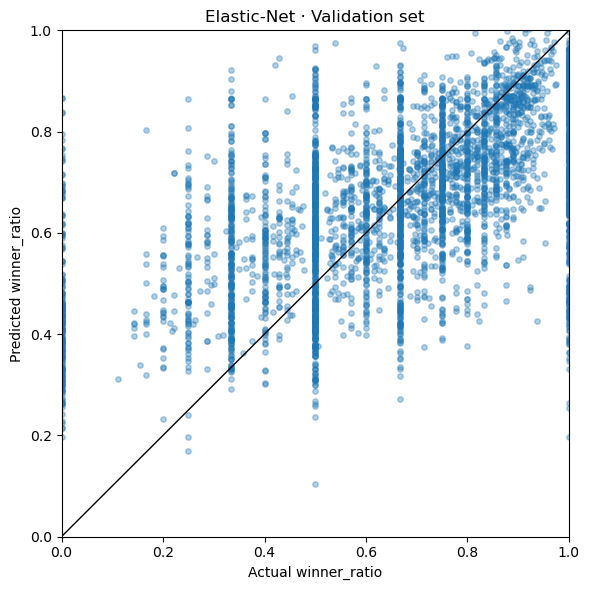

[   9.9s] Finished


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import OneHotEncoder, StandardScaler
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import ElasticNetCV
from sklearn.metrics           import mean_squared_error
from time import perf_counter

# ---------------------------------------------------------
# 0 · basic timing helper
# ---------------------------------------------------------
t0 = perf_counter()
def tick(msg):
    print(f"[{perf_counter()-t0:6.1f}s] {msg}")

# ---------------------------------------------------------
# 1 · target / predictors
# ---------------------------------------------------------
tick("Preparing target & predictors")
y = train.pop("winner_ratio")
X = train

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

# ---------------------------------------------------------
# 3 · preprocessing + model
# ---------------------------------------------------------
tick("Building preprocessing pipeline")
pre = ColumnTransformer(
      [("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
       ("num", StandardScaler(),                     num_cols)],
      sparse_threshold=0.3)

enet = ElasticNetCV(
        l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        alphas=np.logspace(-4, 1, 30),
        cv=15,
        max_iter=20_000,
        n_jobs=-1,
        verbose=1,          # <‑‑ prints CV progress
        random_state=42)

pipe = Pipeline([("pre", pre), ("enet", enet)])

# ---------------------------------------------------------
# 4 · fit
# ---------------------------------------------------------
tick("Fitting Elastic‑Net CV …")
pipe.fit(X_tr, y_tr)
tick("Model fit complete")

# ---------------------------------------------------------
# 5 · evaluate
# ---------------------------------------------------------
y_pred = pipe.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred)
tick(f"Validation MSE = {mse_val:.6f}")
print(f"   best α       = {pipe.named_steps['enet'].alpha_:.4f}")
print(f"   best ℓ₁‑ratio = {pipe.named_steps['enet'].l1_ratio_}")

# ---------------------------------------------------------
# 6 · diagnostic plot
# ---------------------------------------------------------
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.35, s=15)
lim = [0, 1]
plt.plot(lim, lim, c="k", lw=1)
plt.xlim(lim); plt.ylim(lim)
plt.xlabel("Actual winner_ratio")
plt.ylabel("Predicted winner_ratio")
plt.title("Elastic‑Net · Validation set")
plt.tight_layout()
plt.show()
tick("Finished")


In [66]:
from sklearn.linear_model import ElasticNet

# ----------------------------------------------
# 1 · Extract full feature names after OHE + scale
# ----------------------------------------------
ohe = pipe.named_steps["pre"].named_transformers_["cat"]
num = pipe.named_steps["pre"].named_transformers_["num"]
cat_feature_names = ohe.get_feature_names_out(cat_cols)
full_feature_names = np.concatenate([cat_feature_names, num_cols])

# ----------------------------------------------
# 2 · Get coefficients
# ----------------------------------------------
coef = pipe.named_steps["enet"].coef_

feature_importance = pd.Series(coef, index=full_feature_names)
important_feats = feature_importance[feature_importance.abs() > 1e-4].sort_values(ascending=False)

print("Top features:\n", important_feats.head(10))

# ----------------------------------------------
# 3 · Rebuild pipeline using only top features
# ----------------------------------------------
top_feats = important_feats.index.tolist()

# Build a new transformer for only these
pre_reduced = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith("state_") or f.startswith("contributor_type_") or f.startswith("general_sector_new_") for f in top_feats)]),
    ("num", StandardScaler(), [f for f in top_feats if f in num_cols])
], sparse_threshold=0.3)

enet_final = ElasticNet(
    alpha=pipe.named_steps["enet"].alpha_,
    l1_ratio=pipe.named_steps["enet"].l1_ratio_,
    max_iter=20000
)

pipe_reduced = Pipeline([("pre", pre_reduced), ("enet", enet_final)])

# ----------------------------------------------
# 4 · Refit and evaluate
# ----------------------------------------------
pipe_reduced.fit(X_tr, y_tr)
y_pred_reduced = pipe_reduced.predict(X_val)
mse_reduced = mean_squared_error(y_val, y_pred_reduced)

print(f"\n📉 Refined model MSE: {mse_reduced:.6f} using {len(top_feats)} features")


Top features:
 politician_incumbency_ratio_logit                  0.343464
politician_incumbency_ratio_is_zero                0.150700
state_CO                                           0.043070
state_NY                                           0.032171
state_NC                                           0.032061
contributor_type_Non-Individual                    0.026521
state_CT                                           0.024870
politician_challenger_ratio_is_one                 0.021528
state_WA                                           0.016523
general_sector_new_Construction & Manufacturing    0.015557
dtype: float64

📉 Refined model MSE: 0.042979 using 55 features


In [67]:
important_feats

politician_incumbency_ratio_logit                  0.343464
politician_incumbency_ratio_is_zero                0.150700
state_CO                                           0.043070
state_NY                                           0.032171
state_NC                                           0.032061
contributor_type_Non-Individual                    0.026521
state_CT                                           0.024870
politician_challenger_ratio_is_one                 0.021528
state_WA                                           0.016523
general_sector_new_Construction & Manufacturing    0.015557
state_LA                                           0.013351
politician_open_pos_ratio_is_one                   0.013179
state_VT                                           0.011428
state_IL                                           0.010654
general_sector_new_Other / Misc                    0.008197
state_NM                                           0.006961
candidacy_count                         

In [68]:
train = train_bkp.copy()


[   0.0s] 🔍 CatBoost: grid‑search
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[ 927.0s]    best params: {'model__depth': 6, 'model__iterations': 1000, 'model__l2_leaf_reg': 5, 'model__learning_rate': 0.03, 'model__rsm': 0.8, 'model__subsample': 0.6}
[ 927.3s]    full MSE (train/val) = 0.0338 / 0.0404
[ 927.3s]    selected top 40 features
[ 928.9s]    reduced MSE (train/val) = 0.0345 / 0.0405
[ 928.9s]    pipeline saved → catboost_pipeline.pkl



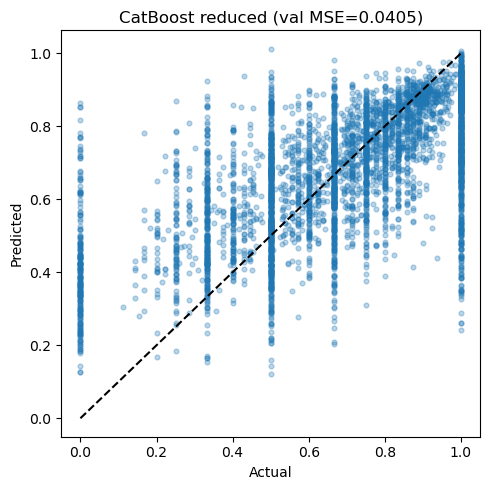

In [69]:
# ==================================================================================
# 0 · PREP & IMPORTS
# ==================================================================================
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection   import train_test_split, GridSearchCV
from sklearn.preprocessing     import OneHotEncoder
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.metrics           import mean_squared_error

from sklearn.ensemble          import RandomForestRegressor
from xgboost                   import XGBRegressor
import catboost
from catboost import CatBoostRegressor

# assume `train_bkp` is your original DataFrame
train = train_bkp.copy()

# ─────────────────────────────────────────────────────────────────────────────
# 1 · SPLIT OUT TARGET & PREDICTORS
# ─────────────────────────────────────────────────────────────────────────────
y = train.pop("winner_ratio")
X = train.copy()

cat_cols = ["state", "contributor_type", "general_sector_new"]
num_cols = X.columns.difference(cat_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# timing helper
t0 = time.perf_counter()
tick = lambda msg: print(f"[{time.perf_counter()-t0:6.1f}s] {msg}")

# ==================================================================================
# 2 · GENERIC BUILD‑AND‑REFIT FUNCTION
# ==================================================================================
def tree_workflow(name, base_estimator, param_grid, top_k=40):
    tick(f"🔍 {name}: grid‑search")
    pre = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough",                     num_cols),
    ], sparse_threshold=0.3)

    pipe = Pipeline([("pre", pre), ("model", base_estimator)])

    search = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_tr, y_tr)

    best_pipe  = search.best_estimator_
    best_model = best_pipe.named_steps["model"]
    tick(f"   best params: {search.best_params_}")

    # full‑model metrics
    mse_tr_full  = mean_squared_error(y_tr, best_pipe.predict(X_tr))
    mse_val_full = mean_squared_error(y_val, best_pipe.predict(X_val))
    tick(f"   full MSE (train/val) = {mse_tr_full:.4f} / {mse_val_full:.4f}")

    # feature importances
    ohe = best_pipe.named_steps["pre"].named_transformers_["cat"]
    feat_names = np.concatenate([ohe.get_feature_names_out(cat_cols), num_cols])
    importances = best_model.feature_importances_
    imp_series  = pd.Series(importances, index=feat_names).abs().sort_values(ascending=False)

    top_feats = imp_series.head(top_k).index.tolist()
    tick(f"   selected top {top_k} features")

    # retrain on subset
    pre_reduced = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), [c for c in cat_cols if any(f.startswith(c+"_") for f in top_feats)]),
        ("num", "passthrough", [f for f in top_feats if f in num_cols]),
    ], sparse_threshold=0.3)

    model_reduced = base_estimator.__class__(**best_model.get_params())
    pipe_reduced  = Pipeline([("pre", pre_reduced), ("model", model_reduced)])
    pipe_reduced.fit(X_tr, y_tr)

    mse_tr_red  = mean_squared_error(y_tr,  pipe_reduced.predict(X_tr))
    mse_val_red = mean_squared_error(y_val, pipe_reduced.predict(X_val))
    tick(f"   reduced MSE (train/val) = {mse_tr_red:.4f} / {mse_val_red:.4f}")

    # save pipeline
    fname = f"{name.lower()}_pipeline.pkl"
    joblib.dump(pipe_reduced, fname)
    tick(f"   pipeline saved → {fname}\n")

    # diagnostic plot
    plt.figure(figsize=(5,5))
    plt.scatter(y_val, pipe_reduced.predict(X_val), alpha=0.3, s=12)
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"{name} reduced (val MSE={mse_val_red:.4f})")
    plt.xlabel("Actual"); plt.ylabel("Predicted")
    plt.tight_layout(); plt.show()


# ==================================================================================
# 5 · CATBOOST
# ==================================================================================
cb_params = {
    "model__iterations":    [200, 500, 1000],
    "model__depth":         [4, 6, 8],
    "model__learning_rate": [0.01, 0.03, 0.05],
    "model__l2_leaf_reg":   [1, 3, 5],
    "model__subsample":     [0.6, 0.8, 1.0],
    "model__rsm":           [0.6, 0.8, 1.0]
}

tree_workflow(
    "CatBoost",
    CatBoostRegressor(loss_function="RMSE", random_seed=42, verbose=0),
    cb_params,
    top_k=40
)


[ 929.1s] 🔍 RandomForest: grid‑search
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/opt/anaconda3/envs/env3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[1214.9s]    best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__n_estimators': 800}
[1215.3s]    full MSE (train/val) = 0.0316 / 0.0414
[1215.3s]    selected top 40 features
[1219.8s]    reduced MSE (train/val) = 0.0310 / 0.0414
[1219.9s]    pipeline saved → randomforest_pipeline.pkl



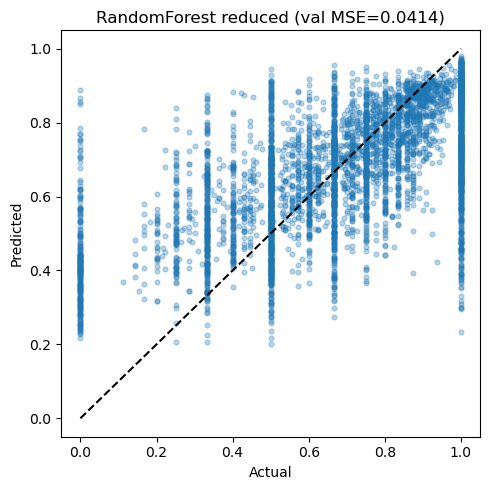

[1220.2s] 🔍 XGBoost: grid‑search
Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[1563.6s]    best params: {'model__colsample_bytree': 0.8, 'model__gamma': 0, 'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 500, 'model__subsample': 0.8}
[1563.7s]    full MSE (train/val) = 0.0359 / 0.0405
[1563.7s]    selected top 40 features
[1564.2s]    reduced MSE (train/val) = 0.0359 / 0.0406
[1564.2s]    pipeline saved → xgboost_pipeline.pkl



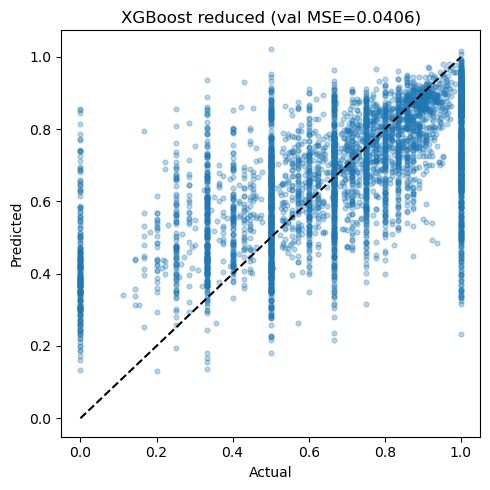

In [70]:

# ==================================================================================
# 3 · RANDOM FOREST
# ==================================================================================
rf_params = {
    "model__n_estimators":     [300, 500, 800],
    "model__max_depth":        [None, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features":     ["sqrt", "log2", 0.6]
}

tree_workflow(
    "RandomForest",
    RandomForestRegressor(n_jobs=-1, random_state=42),
    rf_params,
    top_k=40
)


# ==================================================================================
# 4 · XGBOOST
# ==================================================================================
xgb_params = {
    "model__n_estimators":     [300, 500, 800],
    "model__learning_rate":    [0.01, 0.05, 0.1],
    "model__max_depth":        [3, 5, 7],
    "model__subsample":        [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__gamma":            [0, 0.5, 1.0]
}

tree_workflow(
    "XGBoost",
    XGBRegressor(objective="reg:squarederror", n_jobs=-1, random_state=42),
    xgb_params,
    top_k=40
)




In [71]:
train = train_bkp.copy()

In [ ]:
cols = ['winner_ratio']
plot_histograms(df, cols, bins=30, cols_per_row=3, figsize=(15, 4), wide_range_factor=100):

In [75]:
train.winner_ratio.value_counts().to_clipboard()

In [ ]:
train_bkp = train.copy()

In [76]:

y = train.pop(target).astype("float32")
X = train.copy()
# ---------------------------------------------------------
# 2 · train / validation split
# ---------------------------------------------------------
tick("Splitting 80/20 train–val")
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=None)

eps = 1e-6

y_tr_logit  = np.log((y_tr  + eps) / (1 - y_tr  + eps)).astype("float32")


[7847.9s] Splitting 80/20 train–val


In [79]:
train = train_bkp.copy()

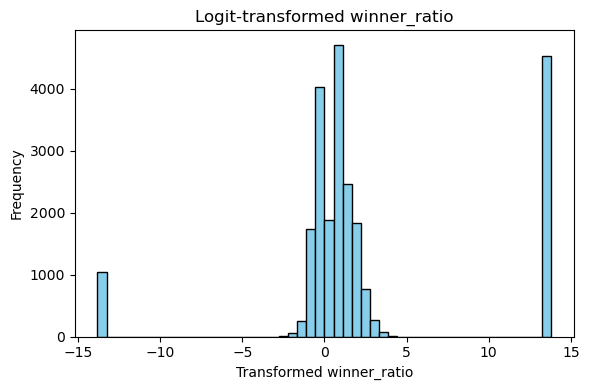

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Small epsilon to avoid log(0) or log(∞)
eps = 1e-6

# Apply logit transformation
train["winner_ratio_logit"] = np.log((train["winner_ratio"] + eps) / (1 - train["winner_ratio"] + eps))

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(train["winner_ratio_logit"], bins=50, color="skyblue", edgecolor="black")
plt.title("Logit-transformed winner_ratio")
plt.xlabel("Transformed winner_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


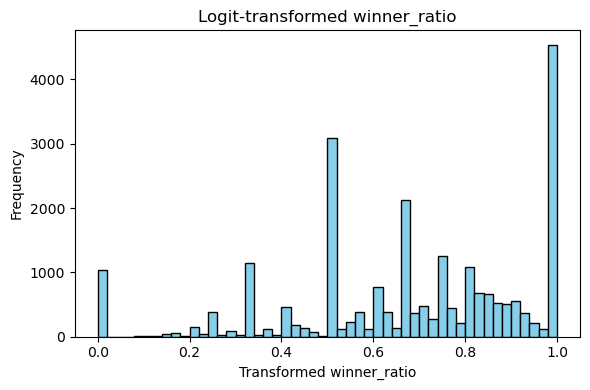

In [82]:
# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(train["winner_ratio"], bins=50, color="skyblue", edgecolor="black")
plt.title("winner_ratio")
plt.xlabel("Transformed winner_ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()